# <strong><span style="color: #EA6A47">  Lead Scoring case study -- Logistic Regression  </span></strong>


## Steps Followed 
     Step 1: Importing Libraries and Data 
        -- Importing Libraries, Suppress Warnings and Set Display
        -- Reading the data and Understanding the data
     Step 2: Cleaning the Data
        -- Treatment for "Select" values
        -- Duplicate check
        -- Missing Value check
        -- Dropping unwanted columns and columns of unique value 1
        -- Data type check
        -- Handling Outliers and Skewed columns
     Step 3: EDA
        -- Visualizing the target variable        -- Visualizing categorical Variables       
        -- Visualizing numerical Variables
     Step 4: Data Preparation
        -- Getting dummies
        -- Train Test Split
        -- Scaling
     Step 5:Model Building
        -- Feature Selection Using RFE
        -- Model building
     Step 6:Model Evaluation
        -- Predicting on train set
        -- Evaluation Matrix(Confusion matrix, accuracy etc)
        -- Finding Optimal Cutoff Point           
    Step 7: Making Predictions on the test set
        -- Scaling 
        -- Prediction on Test Dataset using the final model
        -- Test set Model Evaluation   


## <strong><span style="color: #EA6A47"> Step 1: Importing Libraries and Data </span></strong>

###  Import Libraries, Suppress Warnings and Set Display

In [1]:
# import all required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Environment settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None) 

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# statmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Reading the Data

In [2]:
# reading the dataset
df = pd.read_csv('leads.csv')

In [3]:
# shape of the dataset
df.shape

(9240, 37)

<strong><span style="color:green">NOTE:</span></strong> The original dataframe has 9240 rows and 37 columns

In [4]:
# Check data types of columns and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong><span style="color:green">NOTE:</span></strong> There are `Null values` in dataset.

In [5]:
# Viewing the first five rows of the dataset
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## <strong><span style="color:#EA6A47">Step 2:Data cleaning </span></strong>

### Treatment for 'Select' values

As mentioned in the Problem Statement, many of the categorical variables have a level called **`Select`**, which must be handled because it is as good as a null value. One of the reasons might be that the customer did not select any option from the list and hence for such columns, the data remained as default 'Select' for Select.

In [6]:
# List of column having 'Select' values
col_list = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
col_list

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [7]:
# Replacing the 'Select' values to NaN
df = df.replace('Select',np.nan)

In [8]:
# Checking the all 'Select' values have been replaced
col_list = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
col_list

[]

<strong><span style="color:green">NOTE:</span></strong> There is no **`Select`** value in dataframe.

###  Duplicate check

In [9]:
# check for duplicate values 
df.duplicated().sum()

0

<strong><span style="color:green">NOTE:</span></strong> There is  **`no duplicate`** value in dataframe.

###  Handling Missing values

In [10]:
# Finding the percentage of missing values in each column
def missing(df):
    miss_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Missing number'])
    miss_df['missing_percent'] = (df.isnull().sum()*100/len(df)).round(2)
    return miss_df

In [11]:
missing(df)

Missing number  missing_percent
How did you hear about X Education                       7250            78.46
Lead Profile                                             6855            74.19
Lead Quality                                             4767            51.59
Asymmetrique Profile Score                               4218            45.65
Asymmetrique Activity Score                              4218            45.65
Asymmetrique Activity Index                              4218            45.65
Asymmetrique Profile Index                               4218            45.65
City                                                     3669            39.71
Specialization                                           3380            36.58
Tags                                                     3353            36.29
What matters most to you in choosing a course            2709            29.32
What is your current occupation                          2690            29.11
Country                                                  2461            26.63
Page Views Per Visit                                      137             1.48
TotalVisits                                               137             1.48
Last Activity                                             103             1.11
Lead Source                                                36             0.39
Receive More Updates About Our Courses                      0             0.00
I agree to pay the amount through cheque                    0             0.00
Get updates on DM Content                                   0             0.00
Update me on Supply Chain Content                           0             0.00
A free copy of Mastering The Interview                      0             0.00
Prospect ID                                                 0             0.00
Newspaper Article                                           0             0.00
Through Recommendations                                     0             0.00
Digital Advertisement                                       0             0.00
Newspaper                                                   0             0.00
X Education Forums                                          0             0.00
Lead Number                                                 0             0.00
Magazine                                                    0             0.00
Search                                                      0             0.00
Total Time Spent on Website                                 0             0.00
Converted                                                   0             0.00
Do Not Call                                                 0             0.00
Do Not Email                                                0             0.00
Lead Origin                                                 0             0.00
Last Notable Activity                                       0             0.00

<strong><span style="color:green">NOTE: </span></strong>  Dropping the columns having null values more than `40%`

In [12]:
# Finding columns having missing values above 40%
missing_col = df.columns[df.isnull().sum() * 100 / len(df) > 40]
missing_col

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
# Dropping the column having missing values above 40%
df_lead = df.copy()
print('before dropping columns:{}'.format(df_lead.shape))
df_lead.drop(missing_col, axis=1,inplace=True)
print('After dropping columns:{}'.format(df_lead.shape))


before dropping columns:(9240, 37)
After dropping columns:(9240, 30)


In [14]:
# Checking the percentage of null values for the remaining columns
missing(df_lead)

Missing number  missing_percent
City                                                     3669            39.71
Specialization                                           3380            36.58
Tags                                                     3353            36.29
What matters most to you in choosing a course            2709            29.32
What is your current occupation                          2690            29.11
Country                                                  2461            26.63
Page Views Per Visit                                      137             1.48
TotalVisits                                               137             1.48
Last Activity                                             103             1.11
Lead Source                                                36             0.39
Through Recommendations                                     0             0.00
Receive More Updates About Our Courses                      0             0.00
Prospect ID                                                 0             0.00
Newspaper                                                   0             0.00
Update me on Supply Chain Content                           0             0.00
Get updates on DM Content                                   0             0.00
I agree to pay the amount through cheque                    0             0.00
A free copy of Mastering The Interview                      0             0.00
Digital Advertisement                                       0             0.00
Search                                                      0             0.00
X Education Forums                                          0             0.00
Newspaper Article                                           0             0.00
Magazine                                                    0             0.00
Lead Number                                                 0             0.00
Total Time Spent on Website                                 0             0.00
Converted                                                   0             0.00
Do Not Call                                                 0             0.00
Do Not Email                                                0             0.00
Lead Origin                                                 0             0.00
Last Notable Activity                                       0             0.00

In [15]:
# columns having missing values 
col_1 = df_lead.columns[df_lead.isnull().sum() * 100 / len(df_lead) > 0]
col_1

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

In [16]:
# categorical and object type columns which are  having missing values
cat_col = df_lead[col_1].select_dtypes(include=['category', 'object']).columns.tolist()
cat_col

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [17]:
#  int and float type columns which are  having missing values
num_col = df_lead[col_1].select_dtypes(exclude=['category', 'object']).columns.tolist()
num_col

['TotalVisits', 'Page Views Per Visit']

Depending upon the value count of particular column, missing values treatment is selected.

In [18]:
# count of values in each categorical column 
for i in cat_col:
    value_count = df_lead[i].value_counts(dropna=False)
    percentage = df_lead[i].value_counts(dropna=False,normalize=True).mul(100).round(2)
    val_count = pd.concat([value_count,percentage],axis = 1,keys = ['value_count','percentage'] )
    print('value counts of :{} \n'.format(i))
    print(val_count, end='\n\n' )
    print('---'*40,end='\n\n')

value counts of :Lead Source 

                   value_count  percentage
Lead Source                               
Google                    2868       31.04
Direct Traffic            2543       27.52
Olark Chat                1755       18.99
Organic Search            1154       12.49
Reference                  534        5.78
Welingak Website           142        1.54
Referral Sites             125        1.35
Facebook                    55        0.60
NaN                         36        0.39
bing                         6        0.06
google                       5        0.05
Click2call                   4        0.04
Press_Release                2        0.02
Social Media                 2        0.02
Live Chat                    2        0.02
youtubechannel               1        0.01
testone                      1        0.01
Pay per Click Ads            1        0.01
welearnblog_Home             1        0.01
WeLearn                      1        0.01
blog                   

#### Insights:
- <strong><span style=" color: #F64646">Lead Source: </span></strong> `Google` has the highest number of occurrences and null values are around 0.39%.
So we will impute the missing values with "Google".

- <strong><span style=" color: #F64646 ">Last Activity: </span></strong> `Email Opened` has the highest number of occurrences and null values are around 1.11%
So we will impute the missing values with "Email Opened".

- <strong><span style=" color: #F64646 ">Country: </span></strong> `India` has the highest occurrence rate at 70%. Replacing null values with India creates skewed data and is not useful for business purposes. Therefore, `Country` can be dropped

- <strong><span style=" color: #F64646 ">Specialization : </span></strong> Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create an additional category called `Others`.
  
- <strong><span style=" color: #F64646 ">What is your current occupation: </span></strong> We can replace the missing values with `Unemployed` since it has the highest frequency. This variable is crucial from a business perspective because X Education offers online courses, and unemployed individuals may enroll in the courses to enhance their chances of finding employment.

- <strong><span style=" color: #F64646 ">What matters most to you in choosing a course: </span></strong>`Better Career Prospects` has the highest occurrence rate at 70%. Replacing null values with Better Career Prospects creates skewed data and is not useful for business purposes. Therefore, `What matters most to you in choosing a course` can be dropped.

- <strong><span style=" color: #F64646 ">Tags: </span></strong> Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is the current status, this column will not be useful for modeling. Hence it can be dropped.

- <strong><span style=" color: #F64646 ">City : </span></strong>City has 39.71 % missing values. Imputing missing values with Mumbai will make the data more skewed. Skewness will later cause bias in the model. Hence City column can be dropped.

#### <strong><span style="color:Green">dropping the columns</span></strong>:
- What matters most to you in choosing a course 
- Country
- City
- Tags

In [19]:
# dropping the columns
print('before dropping columns:{}'.format(df_lead.shape))
df_lead.drop(['What matters most to you in choosing a course', 'Country', 'City', 'Tags' ],inplace=True,axis=1)
print('After dropping columns:{}'.format(df_lead.shape))

before dropping columns:(9240, 30)
After dropping columns:(9240, 26)


#### <strong><span style="color:Green">Imputation of missing values</span></strong>:

In [20]:
# Imputation is done on 'Specialization',' Lead Source', 'Last Activity',' What is your current occupation' these columns
df_lead = df_lead.fillna(value={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'})
# Checking the percentage of null values for the remaining columns
missing(df_lead)

Missing number  missing_percent
TotalVisits                                          137             1.48
Page Views Per Visit                                 137             1.48
Prospect ID                                            0             0.00
Magazine                                               0             0.00
A free copy of Mastering The Interview                 0             0.00
I agree to pay the amount through cheque               0             0.00
Get updates on DM Content                              0             0.00
Update me on Supply Chain Content                      0             0.00
Receive More Updates About Our Courses                 0             0.00
Through Recommendations                                0             0.00
Digital Advertisement                                  0             0.00
Newspaper                                              0             0.00
X Education Forums                                     0             0.00
Newspaper Article                                      0             0.00
Search                                                 0             0.00
Lead Number                                            0             0.00
What is your current occupation                        0             0.00
Specialization                                         0             0.00
Last Activity                                          0             0.00
Total Time Spent on Website                            0             0.00
Converted                                              0             0.00
Do Not Call                                            0             0.00
Do Not Email                                           0             0.00
Lead Source                                            0             0.00
Lead Origin                                            0             0.00
Last Notable Activity                                  0             0.00

Depending upon the value count of particular column, missing values treatment is selected.

In [21]:
#  count of values in each numerical column 
for i in num_col:
    value_count = df_lead[i].value_counts(dropna=False)
    percentage = df_lead[i].value_counts(dropna=False,normalize=True).mul(100).round(2)
    val_count = pd.concat([value_count,percentage],axis = 1,keys = ['value_count','percentage'] )
    print('value counts of :{} \n'.format(i))
    print(val_count, end='\n\n' )
    print('---'*40,end='\n\n')

value counts of :TotalVisits 

             value_count  percentage
TotalVisits                         
0.0                 2189       23.69
2.0                 1680       18.18
3.0                 1306       14.13
4.0                 1120       12.12
5.0                  783        8.47
6.0                  466        5.04
1.0                  395        4.27
7.0                  309        3.34
8.0                  224        2.42
9.0                  164        1.77
NaN                  137        1.48
10.0                 114        1.23
11.0                  86        0.93
13.0                  48        0.52
12.0                  45        0.49
14.0                  36        0.39
16.0                  21        0.23
15.0                  18        0.19
17.0                  16        0.17
18.0                  15        0.16
20.0                  12        0.13
19.0                   9        0.10
21.0                   6        0.06
23.0                   6        0.06
24.0   

In [22]:
# imputation of null value with mode
df_lead['TotalVisits'].fillna(value =df_lead['TotalVisits'].mode()[0],inplace = True)
df_lead['Page Views Per Visit'].fillna(value =df_lead['Page Views Per Visit'].mode()[0],inplace = True)

In [23]:
# Checking ant the missing value is present or not 
missing(df_lead)

Missing number  missing_percent
Prospect ID                                            0              0.0
Lead Number                                            0              0.0
A free copy of Mastering The Interview                 0              0.0
I agree to pay the amount through cheque               0              0.0
Get updates on DM Content                              0              0.0
Update me on Supply Chain Content                      0              0.0
Receive More Updates About Our Courses                 0              0.0
Through Recommendations                                0              0.0
Digital Advertisement                                  0              0.0
Newspaper                                              0              0.0
X Education Forums                                     0              0.0
Newspaper Article                                      0              0.0
Magazine                                               0              0.0
Search                                                 0              0.0
What is your current occupation                        0              0.0
Specialization                                         0              0.0
Last Activity                                          0              0.0
Page Views Per Visit                                   0              0.0
Total Time Spent on Website                            0              0.0
TotalVisits                                            0              0.0
Converted                                              0              0.0
Do Not Call                                            0              0.0
Do Not Email                                           0              0.0
Lead Source                                            0              0.0
Lead Origin                                            0              0.0
Last Notable Activity                                  0              0.0

<strong><span style="color:green">NOTE: </span></strong>  There is `no null values` in dataset

#### Handling columns with only one unique value
    checking for columns with only one unique value, they were dropped as they provided no insight.

In [24]:
# List of column with only one unique values 
unique_col_1 = df_lead.columns[df_lead.nunique() == 1]
for i in unique_col_1:
    print('column_name:\t{}'.format(i))
    print('\tUnique Values: {}\n'.format(df_lead[i].unique()))


column_name:	Magazine
	Unique Values: ['No']

column_name:	Receive More Updates About Our Courses
	Unique Values: ['No']

column_name:	Update me on Supply Chain Content
	Unique Values: ['No']

column_name:	Get updates on DM Content
	Unique Values: ['No']

column_name:	I agree to pay the amount through cheque
	Unique Values: ['No']



In [25]:
# dropping the column having only one unique value
print('before dropping columns:{}'.format(df_lead.shape))
df_lead.drop(unique_col_1 ,inplace=True,axis=1)
print('After dropping columns:{}'.format(df_lead.shape))

before dropping columns:(9240, 26)
After dropping columns:(9240, 21)


#### Dropping the wanted columns

In [26]:
# viewing the first five rows of dataset
df_lead.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation Search  \
0                   Others                      Unemployed     No   
1                   Others                      Unemployed     No   
2  Business Administration                         Student     No   
3    Media and Advertising                      Unemployed     No   
4                   Others                      Unemployed     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations A free copy of Mastering The Interview  \
0                      No                                     No   
1                      No                                     No   
2                      No                                    Yes   
3                      No                                     No   
4                      No                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [27]:
# dropping the unwanted columns
print('before dropping columns:{}'.format(df_lead.shape))
df_lead.drop(['Prospect ID','Lead Number'] ,inplace=True,axis=1)
print('After dropping columns:{}'.format(df_lead.shape))

before dropping columns:(9240, 21)
After dropping columns:(9240, 19)


In [28]:
# list of numerical columns
numerical_column = df_lead.select_dtypes(include=['int64','float64'] ).columns.tolist()
numerical_column

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [29]:
# list of categorical columns
categorical_column = df_lead.select_dtypes(exclude=['int64','float64'] ).columns.tolist()
categorical_column

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### outliers analysis

#### outlier detection:
    we used the IQR(Interquartile Range)method to detect the outliers.IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points that fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. The box plot is used to explore the dataset and visualize the presence of outliers. 

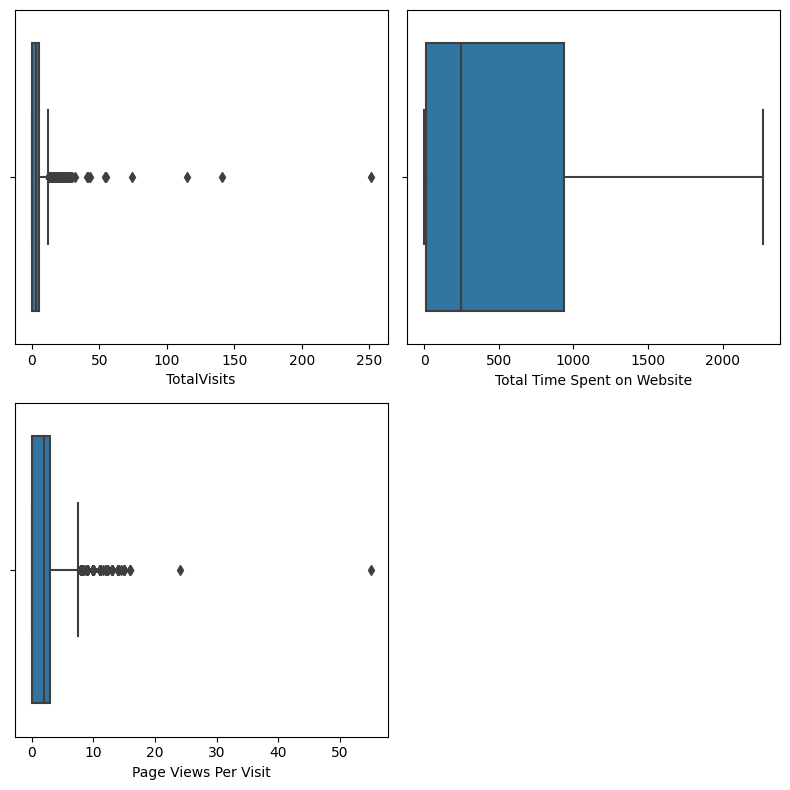

In [30]:
#  plotting box plot for numerical columns
fig = plt.subplots(figsize = (8,8))

for i,features in enumerate(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df_lead[features])
    plt.xlabel(features)
    plt.tight_layout()
    
plt.show()

In [31]:
# describing the numerical column with different percentile value
df_lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles = [0.25,0.5,0.75,0.80,0.95,0.98,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
80%       5.000000                  1087.200000              4.000000
95%      10.000000                  1562.000000              6.000000
98%      13.000000                  1734.000000              8.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

<strong><span style="color:green">NOTE: </span></strong>  `TotalVisits","Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot. There is a sudden in values after the 95 percentile.

#### Outlier Treatment 
        winsorization/ capping method to treat outliers. Outliers are replaced with Q1 - 1.5* IQR and Q3 + 1.5* IQR 

In [32]:
# function for treating outliers
def winsorization(columns):
    for i in columns:
        q1 = df_lead[i].quantile(0.25)
        q3 = df_lead[i].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5*IQR
        upper_bound = q3 + 1.5*IQR
        df_lead[i] = np.where(df_lead[i]< lower_bound, lower_bound,df_lead[i])
        df_lead[i] = np.where(df_lead[i]> upper_bound, upper_bound,df_lead[i])
       

In [33]:
# applying the function to outlier columns
x = ['TotalVisits','Page Views Per Visit']
winsorization(x)

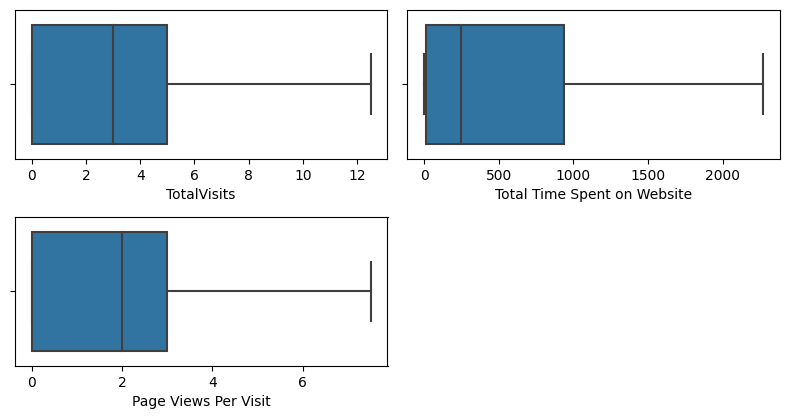

In [34]:
# Check for outlier
fig = plt.subplots(figsize = (8,8))

for i,features in enumerate(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x =df_lead[features])
    plt.xlabel(features)
    plt.tight_layout()
    
plt.show()

In [35]:
# describing the numerical column with different percentile value
df_lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles = [0.25,0.5,0.75,0.80,0.95,0.98,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.213853                   487.698268              2.274987
std       3.005136                   548.021466              1.917776
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
80%       5.000000                  1087.200000              4.000000
95%      10.000000                  1562.000000              6.000000
98%      12.500000                  1734.000000              7.500000
99%      12.500000                  1840.610000              7.500000
max      12.500000                  2272.000000              7.500000

#### check skewness in catgorical data

In [36]:
len(categorical_column)

15

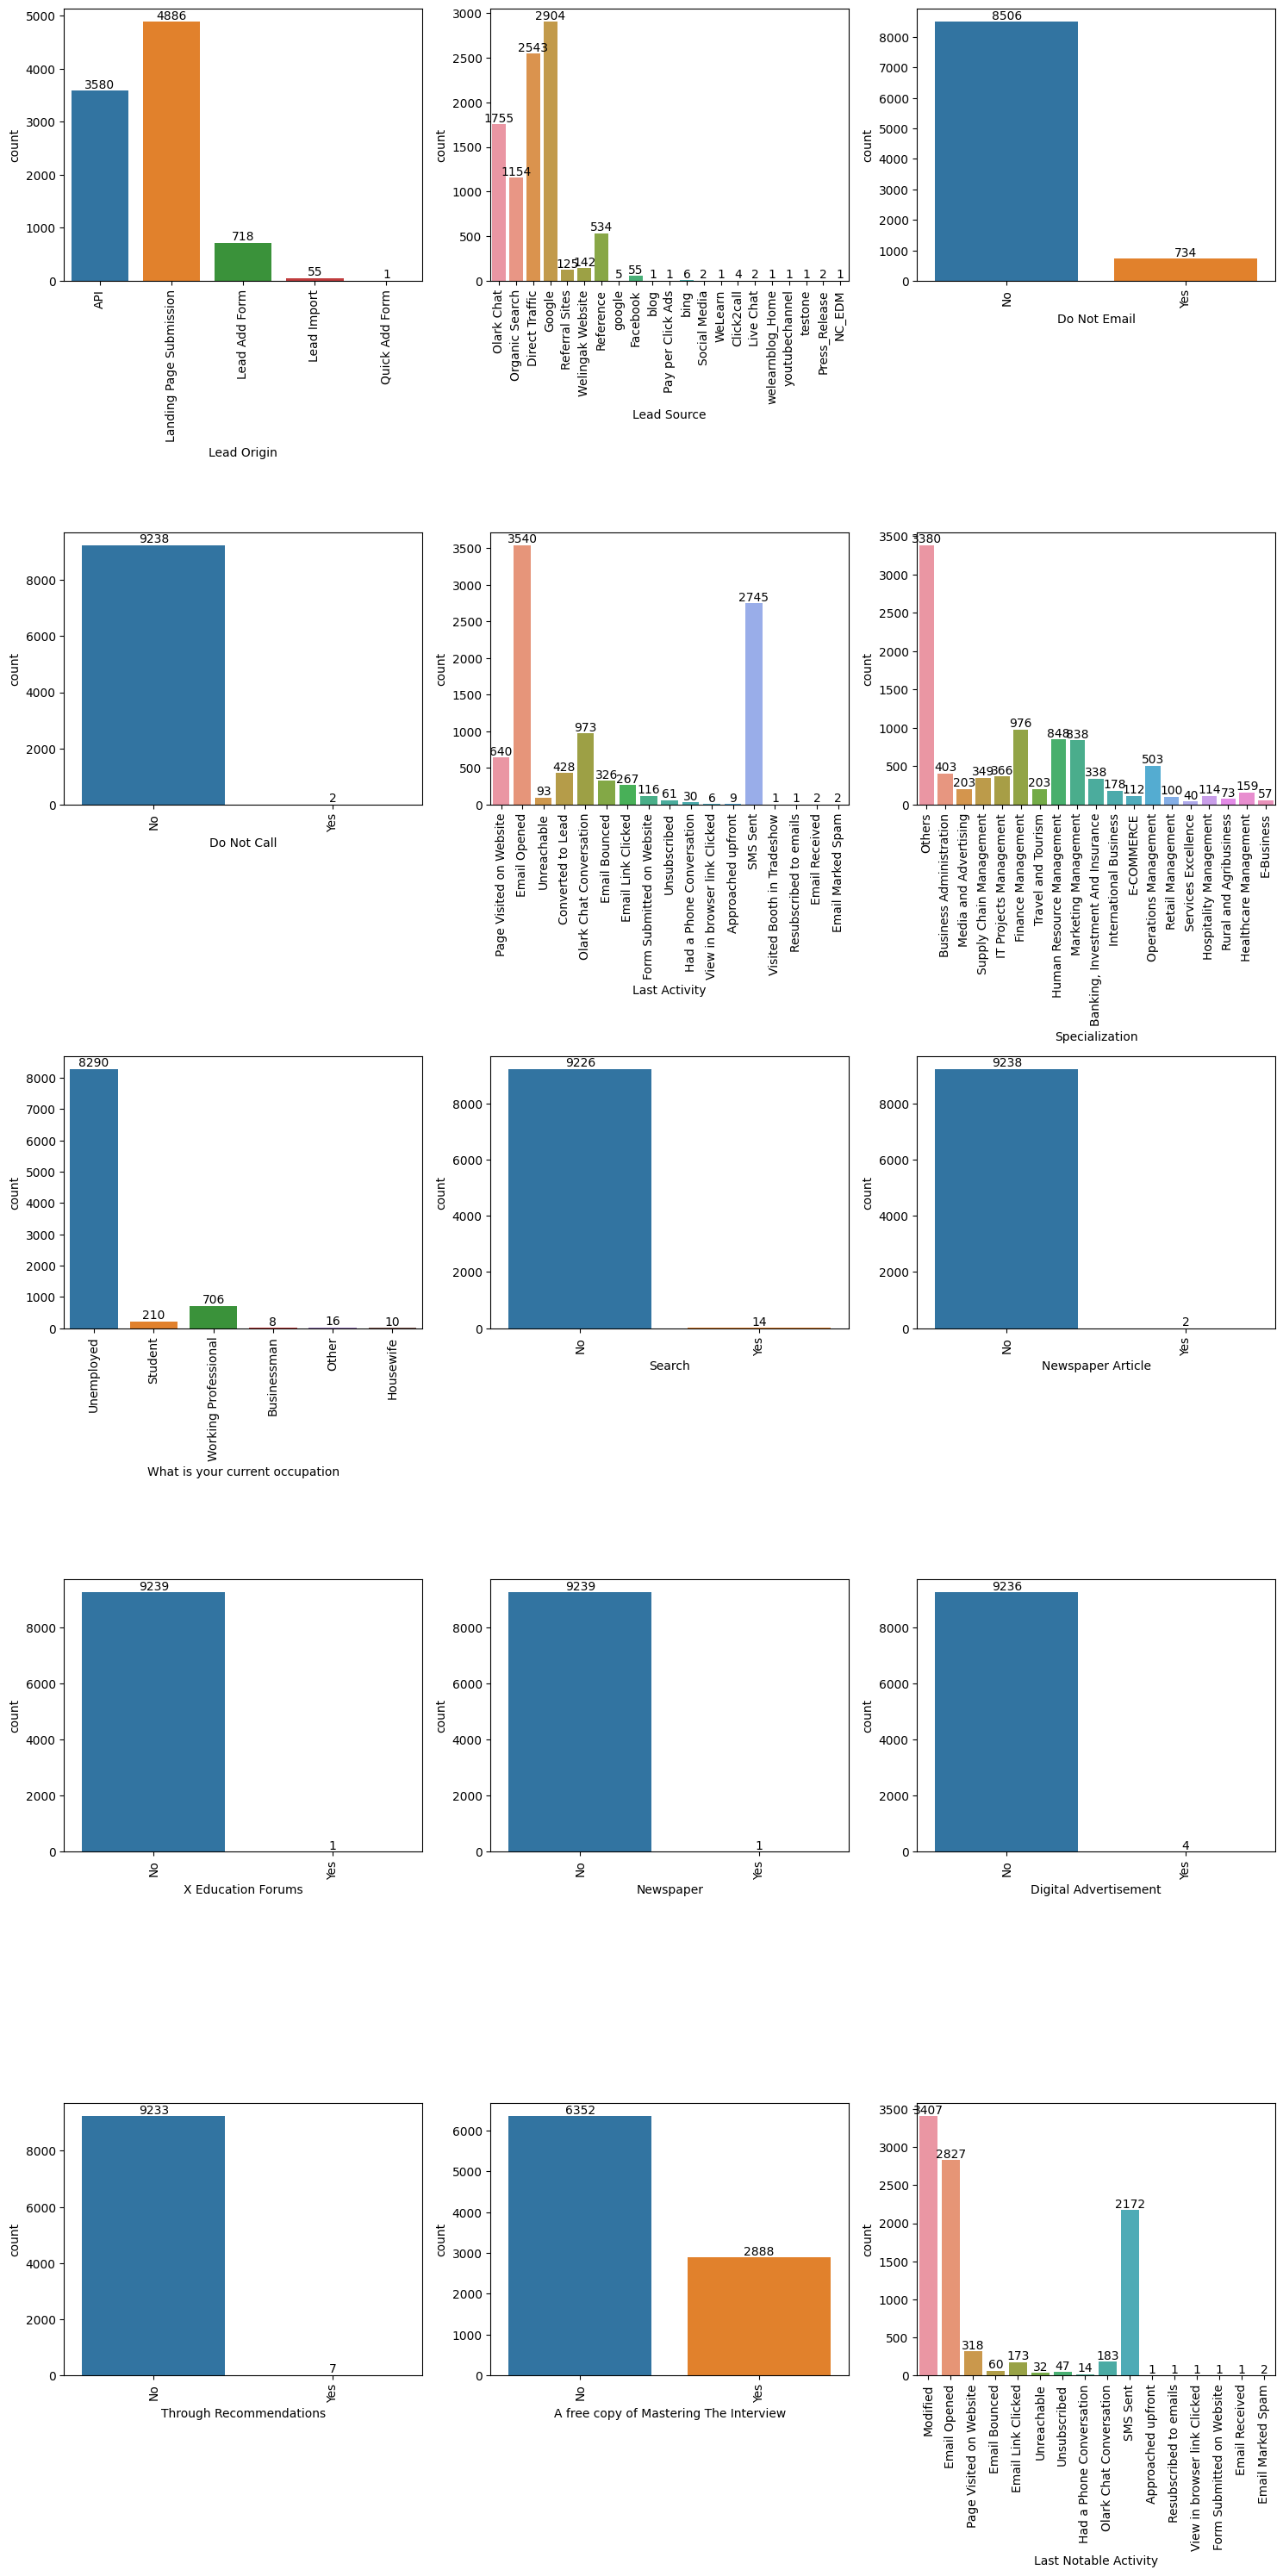

In [37]:
# creating plots for the categorical variables in order to check their skewness.
fig = plt.subplots(figsize = (15,30))

for i,features in enumerate(categorical_column):
    plt.subplot(5,3,i+1)
    ax = sns.countplot(x =df_lead[features])
    plt.xlabel(features)
    plt.xticks(rotation = 90)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.tight_layout()
       
plt.show()

#### The following columns are highly skewed:
- Do Not Call
- Search
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations

so we drop these columns and alse we drop Last Notable Activity which does not provide any insights

In [38]:
# dropping the categorical column with highly skewed data
print('before dropping columns:{}'.format(df_lead.shape))
df_lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Last Notable Activity'] ,inplace=True,axis=1)
print('After dropping columns:{}'.format(df_lead.shape))   

before dropping columns:(9240, 19)
After dropping columns:(9240, 11)


### Fixing Invalid values in categorical columns
- Checking if entries in data are in the correct format or not, casing styles (Upper, lower).- 
Checking data types of columns.

In [39]:
#  count of values in each categorical column 
y = df_lead.select_dtypes(exclude=['int64','float64'] ).columns.tolist()
for i in y :
    value_count = df_lead[i].value_counts(dropna=False)
    percentage = df_lead[i].value_counts(dropna=False,normalize=True).mul(100).round(2)
    val_count = pd.concat([value_count,percentage],axis = 1,keys = ['value_count','percentage'] )
    print('value counts of :{} \n'.format(i))
    print(val_count, end='\n\n' )
    print('---'*40,end='\n\n')

value counts of :Lead Origin 

                         value_count  percentage
Lead Origin                                     
Landing Page Submission         4886       52.88
API                             3580       38.74
Lead Add Form                    718        7.77
Lead Import                       55        0.60
Quick Add Form                     1        0.01

------------------------------------------------------------------------------------------------------------------------

value counts of :Lead Source 

                   value_count  percentage
Lead Source                               
Google                    2904       31.43
Direct Traffic            2543       27.52
Olark Chat                1755       18.99
Organic Search            1154       12.49
Reference                  534        5.78
Welingak Website           142        1.54
Referral Sites             125        1.35
Facebook                    55        0.60
bing                         6        0.06

### grouping the low frequency values

In [40]:
# Grouping low frequency value levels to Others
df_lead['Lead Source'] =df_lead['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [41]:
# Changing google to Google
df_lead['Lead Source'] = df_lead['Lead Source'].replace('google','Google')

# value counts percentage after replace
df_lead['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [42]:
df_lead['Lead Source'].value_counts(normalize= True).mul(100).round(2)

Lead Source
Google              31.48
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
Others               0.25
Name: proportion, dtype: float64

In [43]:
df_lead['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [44]:
df_lead['Last Activity'].value_counts(normalize= True).mul(100).round(2)

Last Activity
Email Opened                    38.31
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: proportion, dtype: float64

In [45]:
# Grouping low frequency value levels to Others 
df_lead['Last Activity'] =df_lead['Last Activity'].replace([ 'Unreachable','Unsubscribed','Had a Phone Conversation', 'View in browser link Clicked',
                                           'Approached upfront', 'Visited Booth in Tradeshow',
                                           'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],'Others')

In [46]:
# value_counts percentage after replace
df_lead['Last Activity'].value_counts(normalize= True).mul(100).round(2)

Last Activity
Email Opened                 38.31
SMS Sent                     29.71
Olark Chat Conversation      10.53
Page Visited on Website       6.93
Converted to Lead             4.63
Email Bounced                 3.53
Email Link Clicked            2.89
Others                        2.22
Form Submitted on Website     1.26
Name: proportion, dtype: float64

In [47]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_lead.rename(columns={'What is your current occupation':'Current Occupation','A free copy of Mastering The Interview':'Free Copy'},inplace = True)

In [48]:
#  viewing the first five rows of dataset
df_lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free Copy  
0        No  
1        No  
2       Yes  
3        No  
4        No

In [49]:
# Checking for missing values
missing(df_lead)

Missing number  missing_percent
Lead Origin                               0              0.0
Lead Source                               0              0.0
Do Not Email                              0              0.0
Converted                                 0              0.0
TotalVisits                               0              0.0
Total Time Spent on Website               0              0.0
Page Views Per Visit                      0              0.0
Last Activity                             0              0.0
Specialization                            0              0.0
Current Occupation                        0              0.0
Free Copy                                 0              0.0

In [50]:
# checking data type
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current Occupation           9240 non-null   object 
 10  Free Copy                    9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


## <strong><span style="color: #EA6A47"> Step 3: Exploratory Data Analysis </span></strong>
### Visualizing the target variable

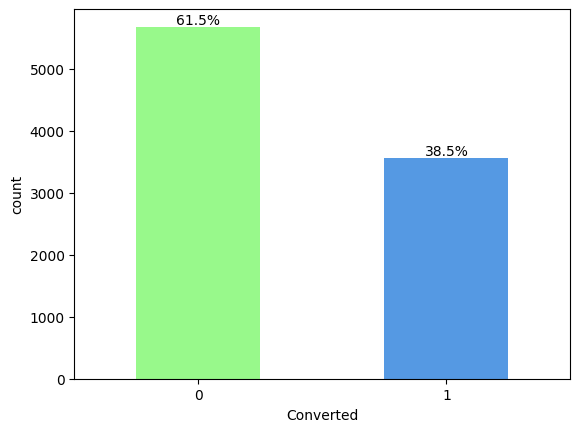

In [51]:
# plotting the target variable
ax = sns.countplot(data = df_lead,x = 'Converted', width=0.5,color = '#3D98FB' )
patch_h = [patch.get_height() for patch in ax.patches]
max_height = np.argmax(patch_h)
ax.patches[max_height].set_facecolor('#98F98B')

total=len(df_lead['Converted'])
for p in ax.patches:
    text = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
#88CEEB
plt.show()

#### <strong><span style="color:green">Insights:</span></strong> 
- Conversion rate is of`38.5%`, meaning only 38.5% of the people have converted to leads.(Minority)- 
While 61.5% of the people didn't convert to leads. (Majority
- Data imbalance ratio : 1.59 : 1 (61.5 : 38.5))

### Visualizing categorical Variables

In [52]:
# Create function to visualize the distribution categorical variable and visualize the distribution categorical variable vs target variable
def categorical_analysis(col):
    fig = plt.subplots(figsize = (14,6))
    plt.subplot(1,2,1)
    ax = sns.countplot(x = df_lead[col], width=0.5,color = 'grey' )
    plt.xticks(rotation = 90)
    patch_h = [patch.get_height() for patch in ax.patches]
    max_height = np.argmax(patch_h)
    ax.patches[max_height].set_facecolor('#ffdb58')
    total=len(df_lead[col])
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'{col} distribution')
    
    
    plt.subplot(1,2,2)
    ax = sns.countplot(x = df_lead[col],hue= df['Converted'], width=0.5,palette=["grey","#b0b0a9"] )
    plt.xticks(rotation = 90)
    patch_h = [patch.get_height() for patch in ax.patches]
    max_height = np.argmax(patch_h)
    ax.patches[max_height].set_facecolor('#ffdb58')
    total=len(df_lead[col])
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = (p.get_x()+0.03) + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'{col} vs converted')
    plt.tight_layout()
  
    
    plt.show()

In [53]:
def conversion_rate_plot(col):
    plt.figure(figsize=(5,6))
    x = pd.DataFrame(df_lead.groupby(col)['Converted'].value_counts(normalize= True).mul(100).round(2))
    x = pd.pivot_table(data=x,index=col,columns='Converted',values='proportion')
    ax = x.plot.bar(color = ["grey","#b0b0a9"])
    plt.xticks(rotation = 90)
    patch_h = [patch.get_height() for patch in ax.patches]
    max_height = np.argmax(patch_h)
    ax.patches[max_height].set_facecolor('#ffdb58')
    for p in ax.patches:
            ax.annotate('{:.0f}%'.format(p.get_height()), ((p.get_x()+0.03) + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Conversion rate')
    plt.title(f'{col} conversion rate')
    
    plt.show()


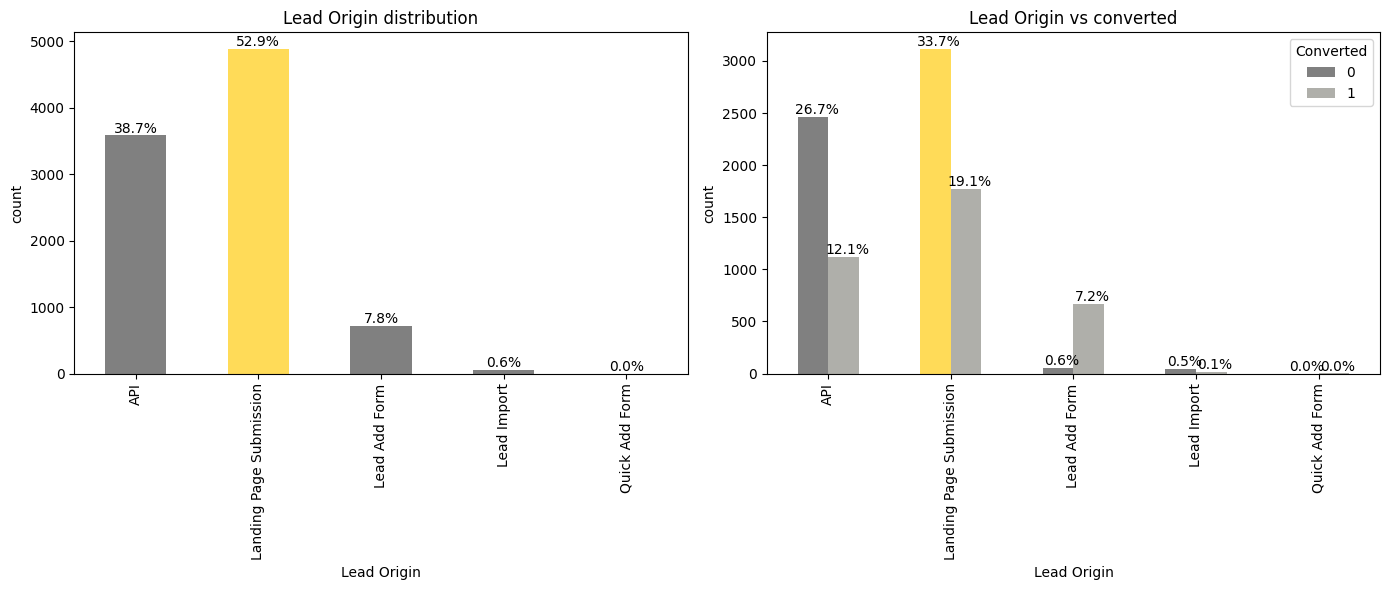

<Figure size 500x600 with 0 Axes>

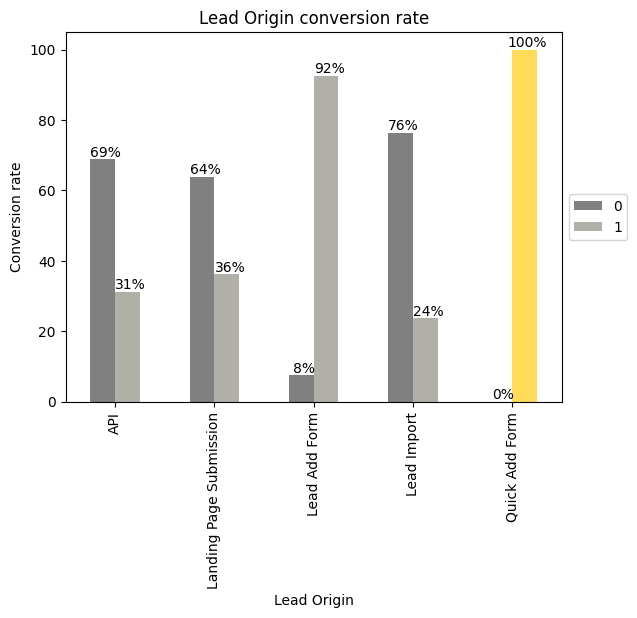

In [54]:
categorical_analysis('Lead Origin')
conversion_rate_plot('Lead Origin')

#### <strong><span style="color:green">Insights:</span></strong> 
- `Landing Page Submission` identified 53% of customers, `API` identified 39% of customers.
- Around 52% of all leads originated from `Landing Page Submission` with a **lead conversion rate (LCR) of 36%**.The `API` identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.
- `Lead Add Form` has more than **90% conversion rate** but the count of lead are not very high. `Lead Import and Quick Add From` are very less in count so the conversation rate is high.

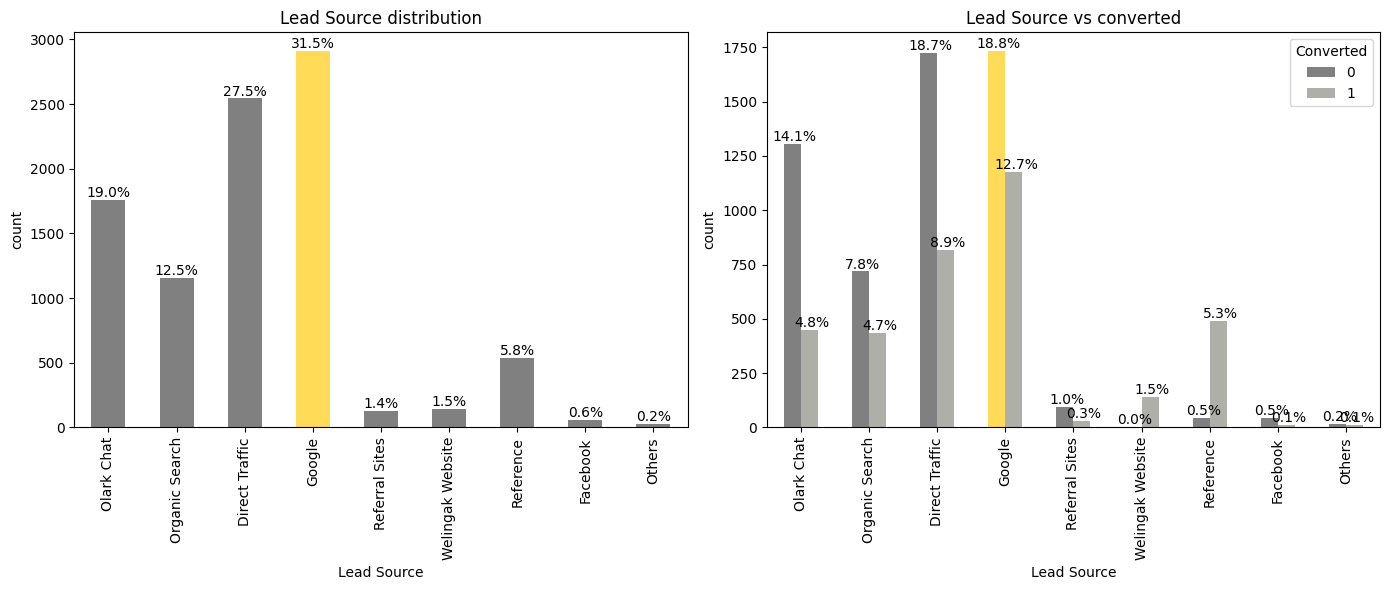

<Figure size 500x600 with 0 Axes>

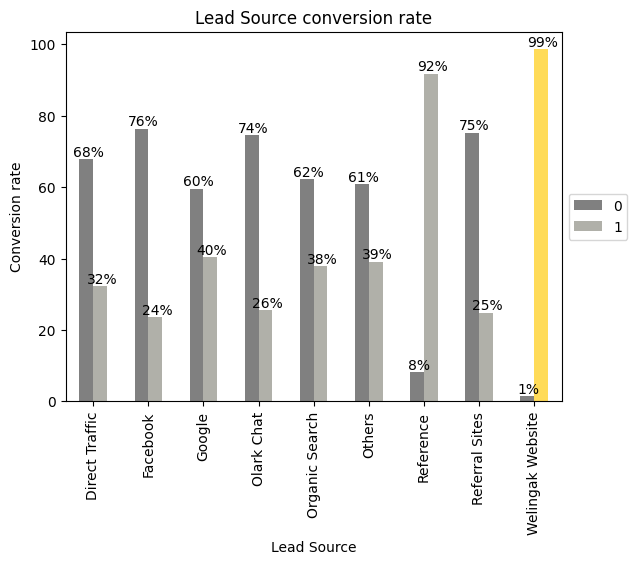

In [55]:
categorical_analysis('Lead Source')
conversion_rate_plot('Lead Source')

#### <strong><span style="color:green">Insights:</span></strong>
- 58% Lead source is from `Google & Direct Traffic` combined.
- `Google` has  **lead conversion rate (LCR)  of 40%** out of 31% customers , `Direct Traffic` contributes **32%  lead conversion rate (LCR)**  with 27% of customers which are lower than Google,`Organic Search` also gives **37.8% of lead conversion rate (LCR)** but the contribution is by only 12.5% of customers ,`Reference` has **lead conversion rate (LCR)  of 91%** but there are only around 6% of customers through this Lead Source.


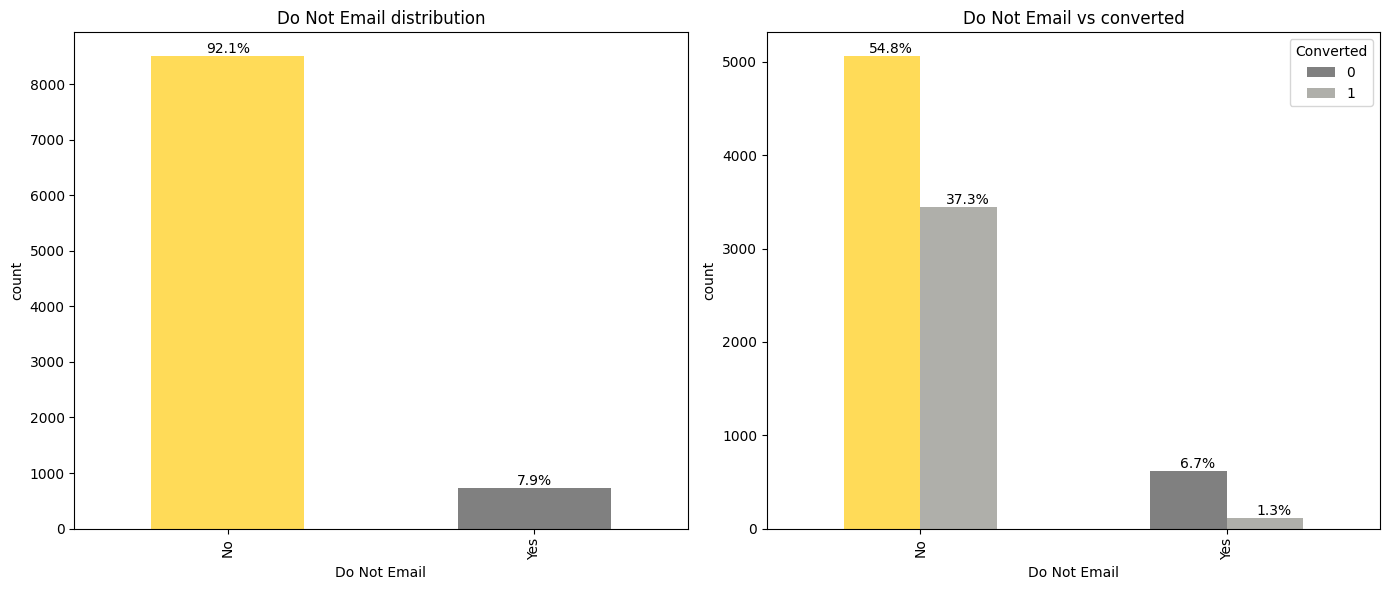

<Figure size 500x600 with 0 Axes>

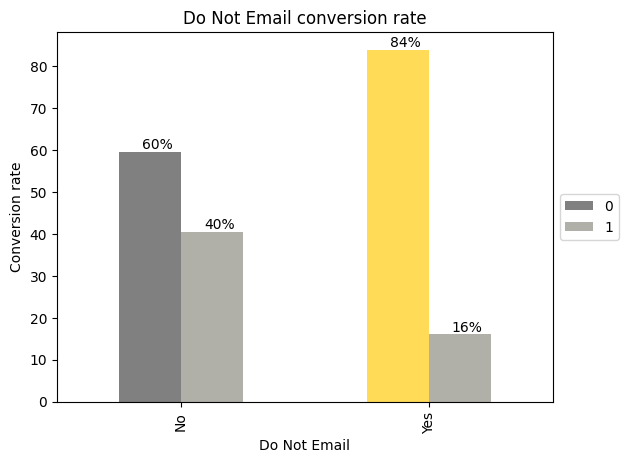

In [56]:
categorical_analysis('Do Not Email')
conversion_rate_plot('Do Not Email')

#### <strong><span style="color:green">Insights:</span></strong>
-  92% of the people have opted that they `Do Not  Email` about the course.
-  the people who have opted that they `Do Not Email` about the course has ` has  **lead conversion rate (LCR)  of 40%** out of 92%.
-  the people have opted that they want`to recieve  emails` about the course has ` has  **lead conversion rate (LCR)  of 16%** out of 10%.  

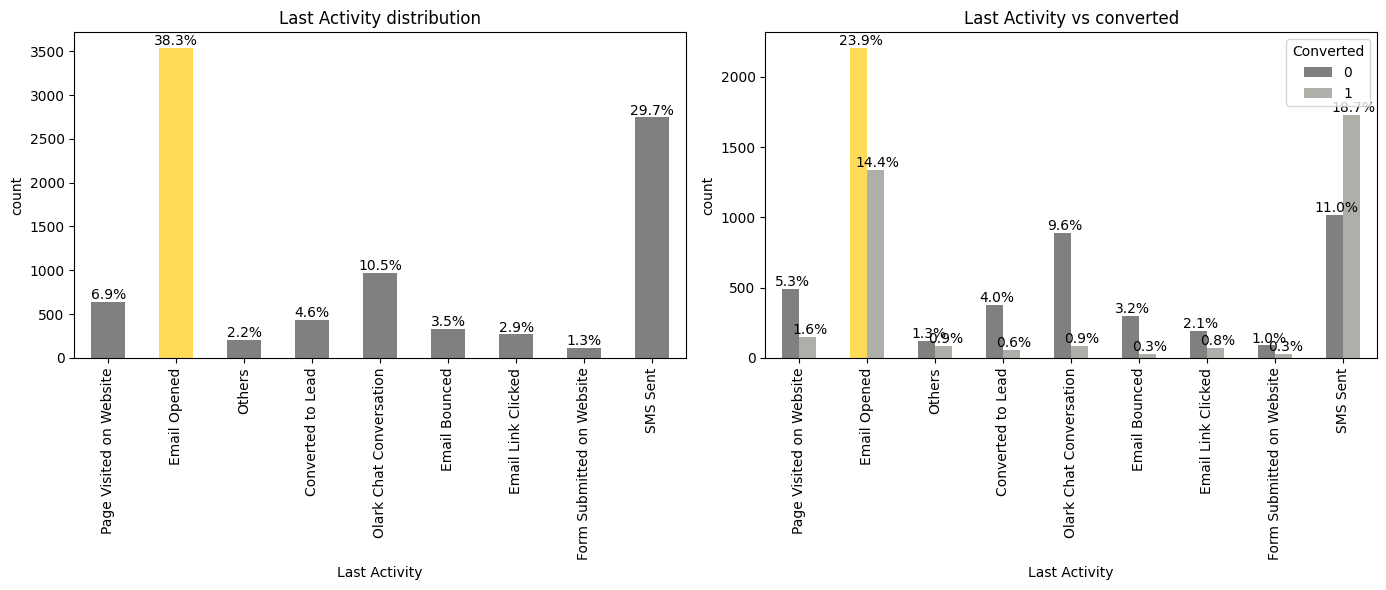

<Figure size 500x600 with 0 Axes>

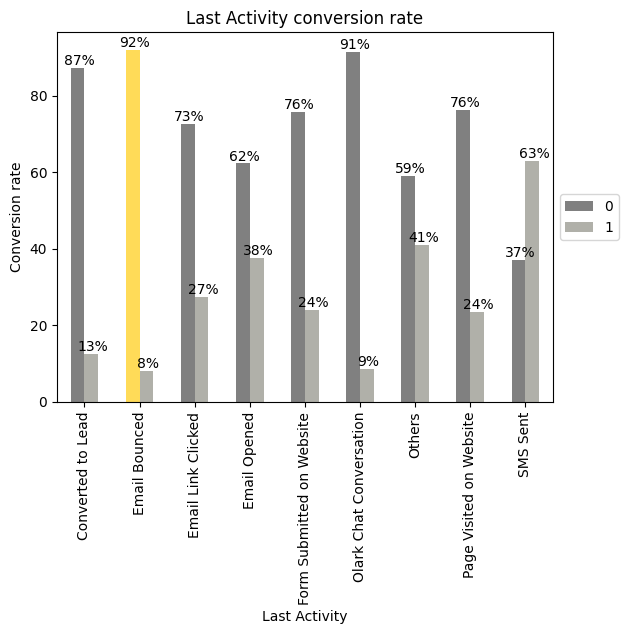

In [57]:
categorical_analysis('Last Activity')
conversion_rate_plot('Last Activity')

#### <strong><span style="color:green">Insights:</span></strong>
-  68% of customers contribution in SMS Sent & Email Opened activities.
-  `SMS Sent` has **high lead conversion rate of 63%** with 30% contribution from last activities, `Email Opened` activity contributed 38% of last activities performed by the customers with **37% lead conversion rate**.

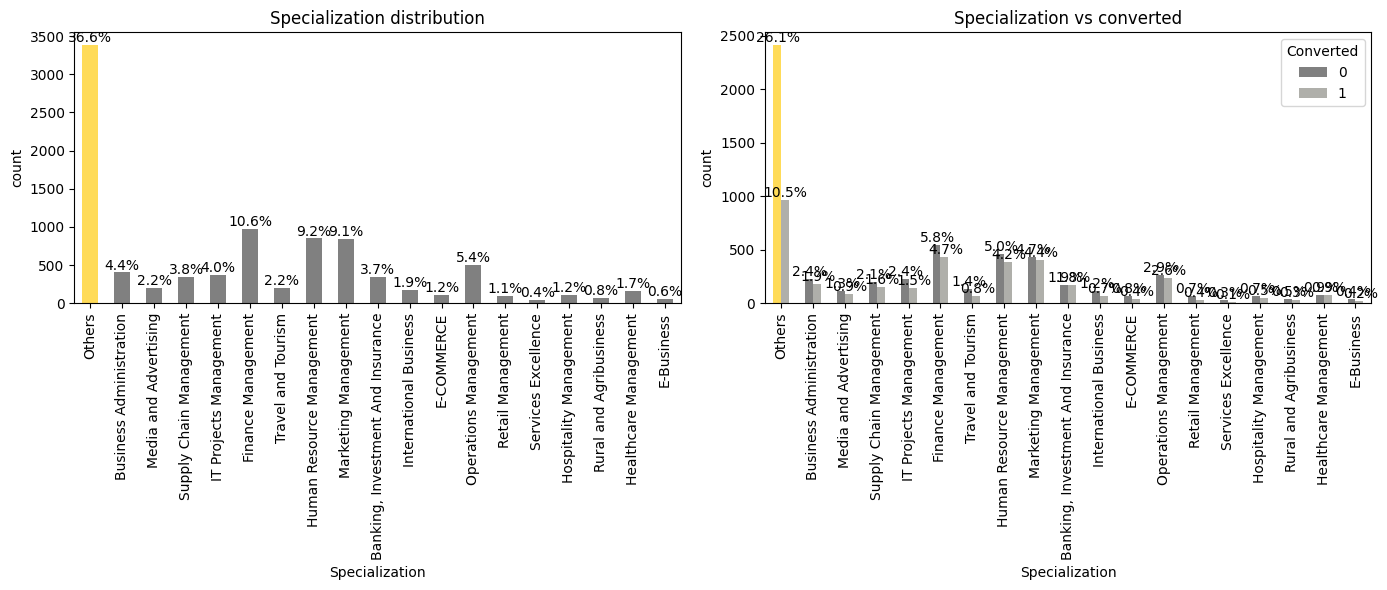

<Figure size 500x600 with 0 Axes>

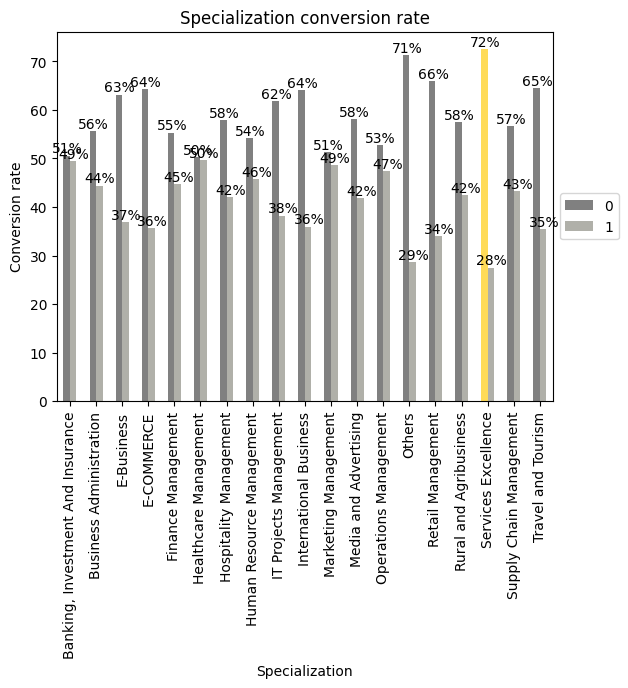

In [58]:
categorical_analysis('Specialization')
conversion_rate_plot('Specialization')

#### <strong><span style="color:green">Insights:</span></strong>
- Most of the leads are from `Others`(Not specied) specialization but the `conversion rate is poor`.
- `banking, Investment and insurance, business, healthcare, HR, Marketing, supply chain management` has  **lead conversion rate (LCR)** 

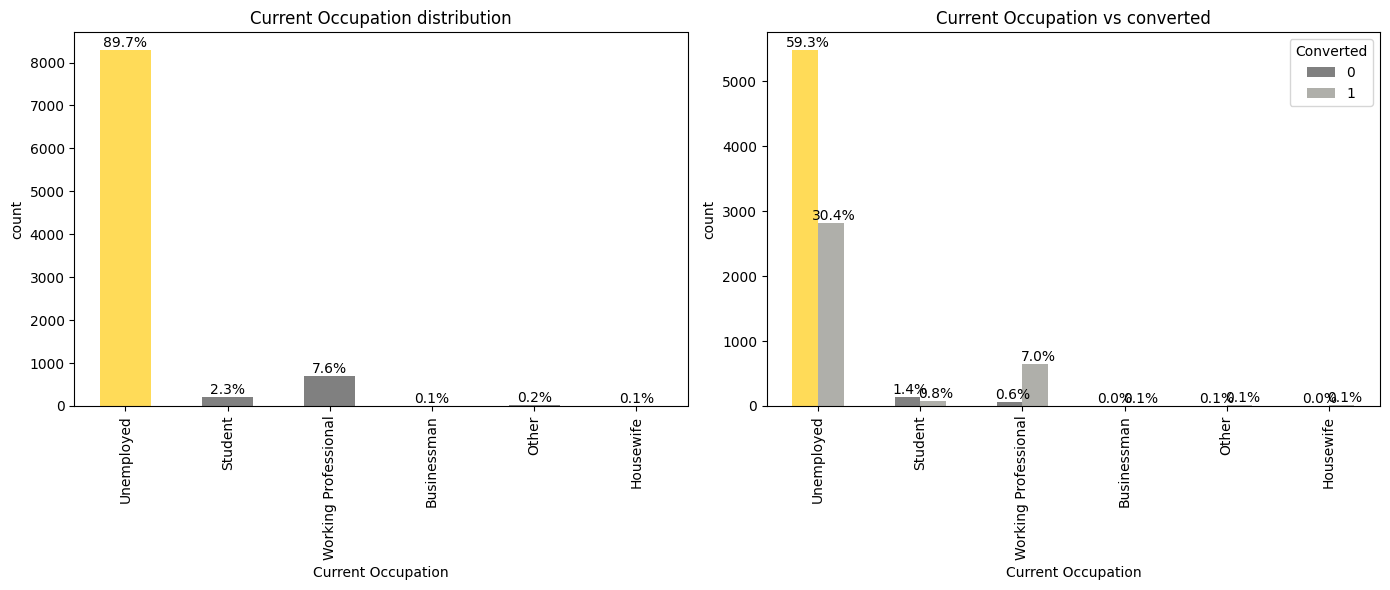

<Figure size 500x600 with 0 Axes>

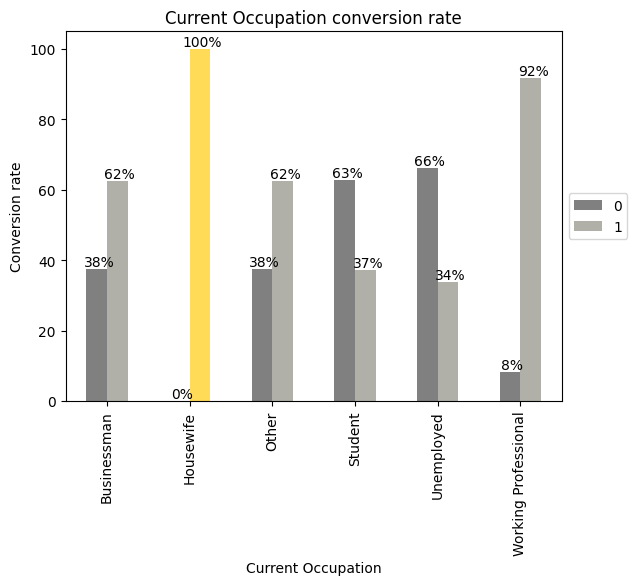

In [59]:
categorical_analysis('Current Occupation')
conversion_rate_plot('Current Occupation')

#### <strong><span style="color:green">Insights:</span></strong>
- It has 90% of the customers as `Unemployed`.
- Around 90% of the customers are `Unemployed` with **lead conversion rate (LCR) of 34%**. While `Working Professional` contributes only 7.6% of total customers with almost **92% lead conversion rate (LCR)**.


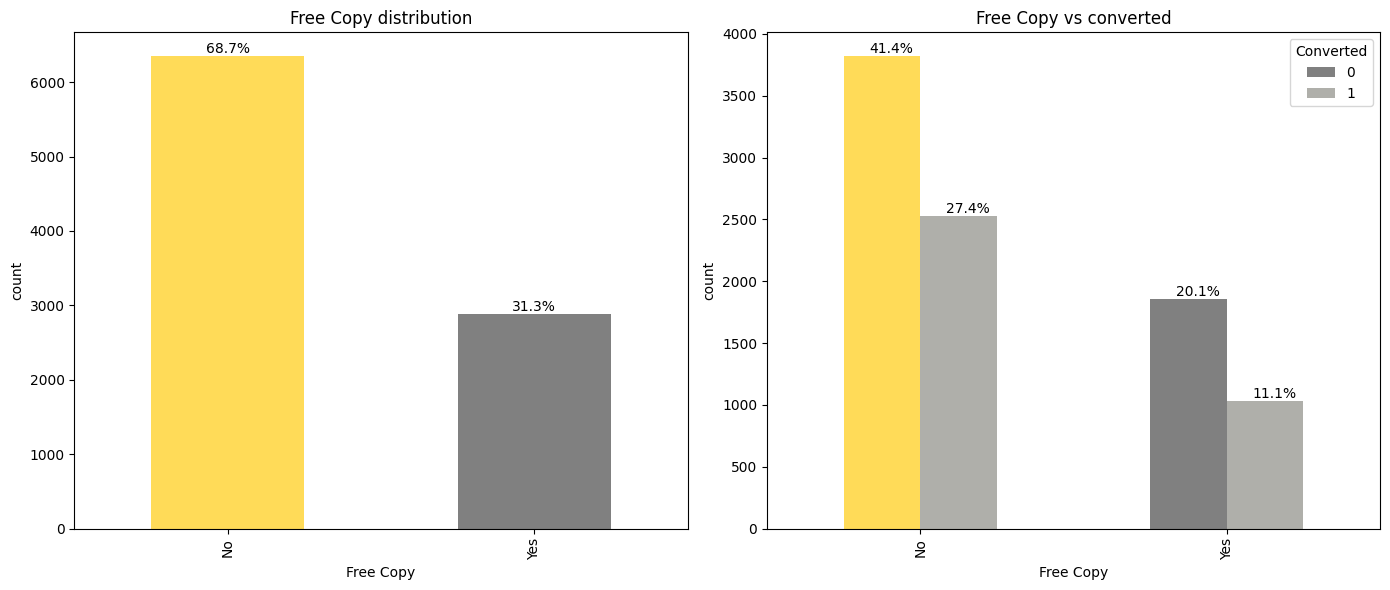

<Figure size 500x600 with 0 Axes>

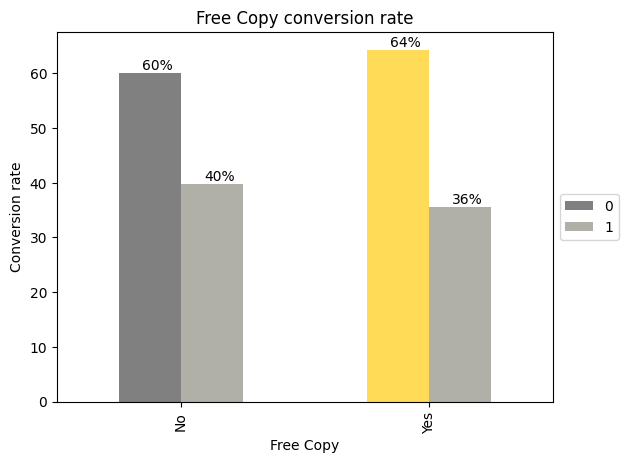

In [60]:
categorical_analysis('Free Copy')
conversion_rate_plot('Free Copy')

#### <strong><span style="color:green">Insights:</span></strong>
- More leads are from those who do not ask for a free copy of Mastering Interviews. Can be focused on
conversion.

## visualzation on numerical variables

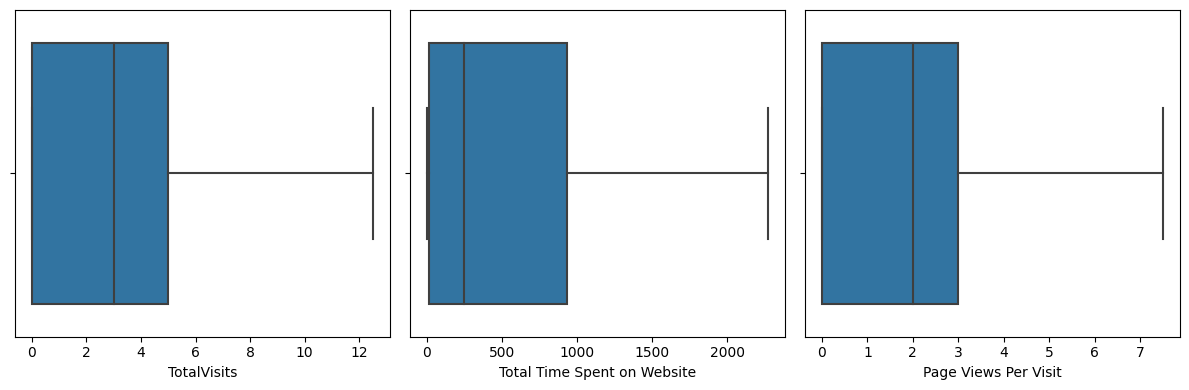

In [61]:
# visulazation onnumerical variable using box plot
fig = plt.subplots(figsize = (12,4))
for i,features in enumerate(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x =df_lead[features])
    plt.xlabel(features)
    plt.tight_layout() 
plt.show()

#### <strong><span style="color:green">Insights:</span></strong>
It has been observed that on average, a customer visits the website for **three times** to gather information about the courses offered. The majority of the customers tend to visit the webpage between **three to five times** to gather a comprehensive understanding of the courses. On average, a customer spends about **five minutes** reviewing the course details webpage. Furthermore, it has been found that a customer usually views around **two pages** on the website

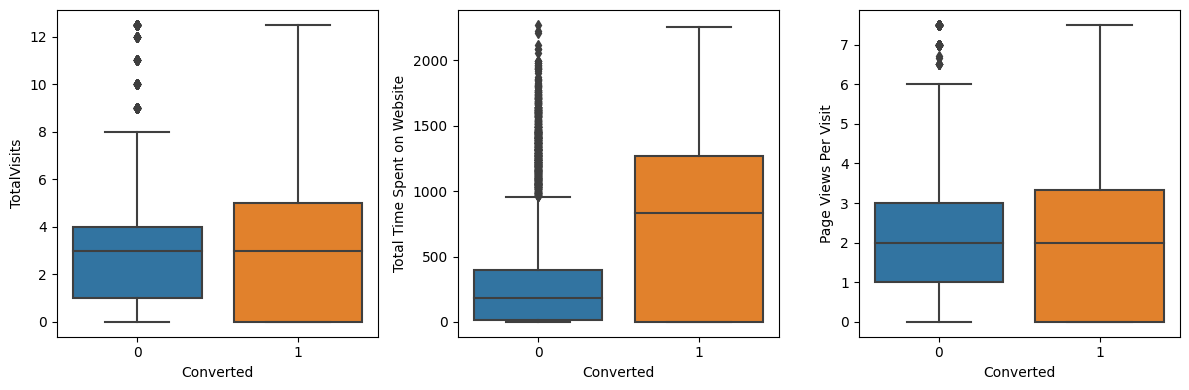

In [62]:
# bivariate analaysis on numerical variables by using box plot.
fig = plt.subplots(figsize = (12,4))
for i,features in enumerate(['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(1,3,i+1)
    sns.boxplot(y =df_lead[features],x = df_lead['Converted'])
    plt.tight_layout() 
plt.show()

#### <strong><span style="color:green">Insights:</span></strong>
- Customers who spent more ( >750sec )on the website are successfully converted to leads.
- There is a high chance if a customer visits above more than 3 times and views more than 3 pages are more likely to be leads.  

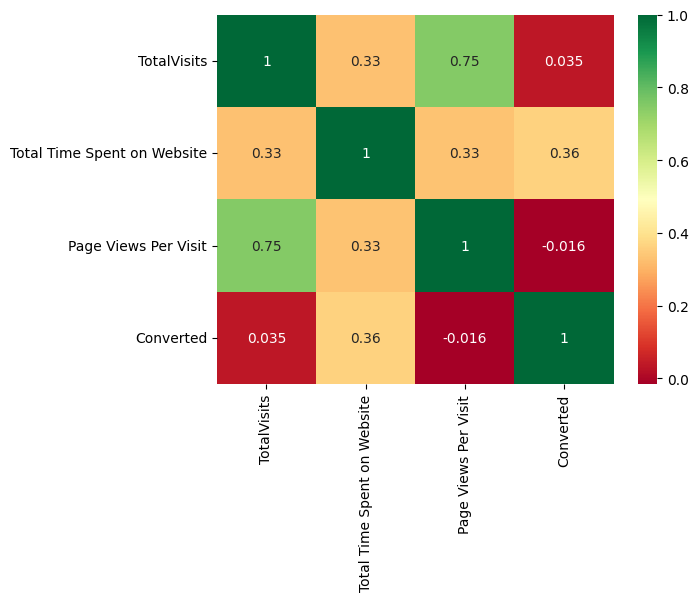

In [63]:
# Heatmap to show a correlation between numerical variables
sns.heatmap(df_lead[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit','Converted']].corr(),annot=True,cmap='RdYlGn')
plt.show()

#### <strong><span style="color:green">Insights:</span></strong>
- Strong correlation between Total Visits and Page Views Per Visits- 
Converted has a good correlation with the Total time spent on the Website

<Figure size 1000x1000 with 0 Axes>

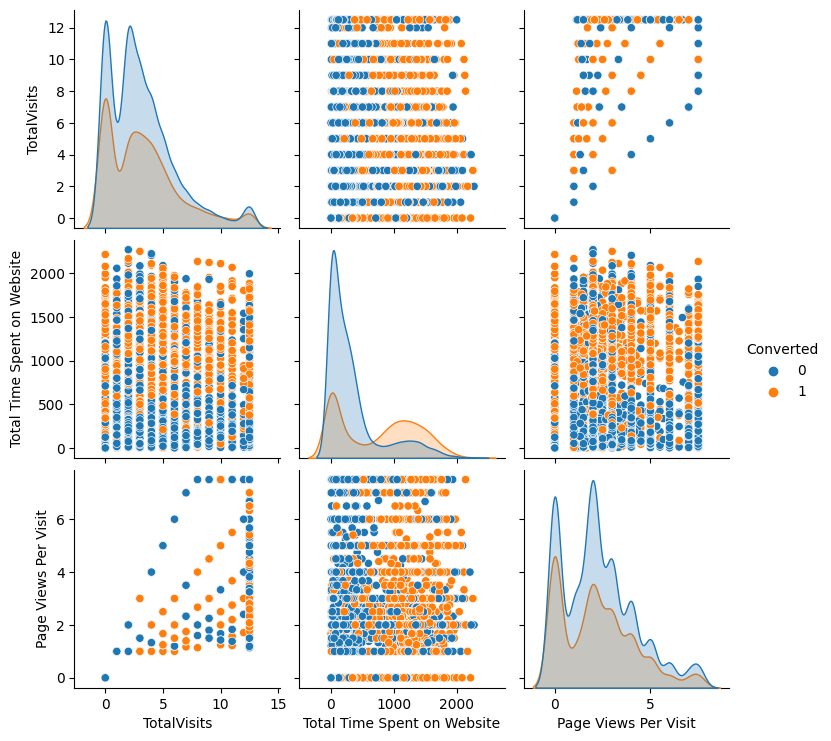

In [64]:
#  correlation between numerical variables using pairplot
plt.figure(figsize=(10,10))
ax = sns.pairplot(data=df_lead,vars=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'],hue="Converted")
plt.show()

## <strong><span style="color: #EA6A47"> Step 4: Data Preparation </span></strong>

### Getting Dummies 

In [65]:
# Viewing the first five rows of dataset
df_lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free Copy  
0        No  
1        No  
2       Yes  
3        No  
4        No

In [66]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current Occupation           9240 non-null   object 
 10  Free Copy                    9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [67]:
# Mapping binary categorical variables (Yes/No to 1/0)  
df_lead['Do Not Email'] = df_lead['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)

df_lead['Free Copy'] = df_lead['Free Copy'].apply(lambda x: 1 if x == 'Yes' else 0)

In [68]:
# Viewing the first five rows of dataset
df_lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free Copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [69]:
#  Creating a dummy variable for some of the categorical variables and dropping the first one
dummby_col = ['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation','Free Copy']
df_lead = pd.get_dummies(data = df_lead,columns=dummby_col,drop_first=True,dtype=float)

In [70]:
# Viewing the first five rows of dataset
df_lead.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                  0.0   
1                   2.5                                  0.0   
2                   2.0                                  1.0   
3                   1.0                                  1.0   
4                   1.0                                  1.0   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        0.0                      0.0   
4                        0.0                      0.0   

   Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
0                         0.0                   0.0                 0.0   
1                         0.0                   0.0                 0.0   
2                         0.0                   0.0                 0.0   
3                         0.0                   0.0                 0.0   
4                         0.0                   0.0                 1.0   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                     1.0                         0.0                 0.0   
1                     0.0                         1.0                 0.0   
2                     0.0                         0.0                 0.0   
3                     0.0                         0.0                 0.0   
4                     0.0                         0.0                 0.0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                    0.0                         0.0   
1                    0.0                         0.0   
2                    0.0                         0.0   
3                    0.0                         0.0   
4                    0.0                         0.0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                               0.0                         0.0   
1                               0.0                         1.0   
2                               0.0                         1.0   
3                               0.0                         0.0   
4                               0.0                         0.0   

   Last Activity_Form Submitted on Website  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                    0.0                   0.0   
1                                    0.0                   0.0   
2                                    0.0                   0.0   
3                                    0.0                   1.0   
4                                    0.0                   0.0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                    1.0                     

In [71]:
# getting the shape of dataset
df_lead.shape

(9240, 49)

## Test Train split

In [72]:
# Putting predictor variables to X
x = df_lead.drop('Converted',axis=1)

# Putting Target variables to y
y = df_lead['Converted']

In [73]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=100)

In [74]:
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')

X_train shape:(6468, 48)
y_train shape:(6468,)


In [75]:
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

X_test shape:(2772, 48)
y_test shape:(2772,)


## Scaling 
- we use **MinMax scaler**.
- MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range.
- It scales the values to a specific value range without changing the shape of the original distribution.

In [76]:
X_train.sample(10)

Do Not Email  TotalVisits  Total Time Spent on Website  \
1239             0          2.0                           97   
6107             0          0.0                            0   
7200             0          1.0                          150   
8362             0          3.0                          541   
3217             0          0.0                            0   
5525             0         12.5                         1377   
3306             0          8.0                          205   
1305             0          3.0                         1117   
9014             0          2.0                            6   
5309             0          2.0                           63   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1239                  2.00                                  1.0   
6107                  0.00                                  0.0   
7200                  1.00                                  0.0   
8362                  3.00                                  1.0   
3217                  0.00                                  0.0   
5525                  6.33                                  0.0   
3306                  2.67                                  1.0   
1305                  1.50                                  0.0   
9014                  1.00                                  0.0   
5309                  2.00                                  1.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1239                        0.0                      0.0   
6107                        0.0                      0.0   
7200                        0.0                      0.0   
8362                        0.0                      0.0   
3217                        0.0                      0.0   
5525                        0.0                      0.0   
3306                        0.0                      0.0   
1305                        0.0                      0.0   
9014                        0.0                      0.0   
5309                        0.0                      0.0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1239                         0.0                   0.0                 0.0   
6107                         0.0                   0.0                 0.0   
7200                         0.0                   0.0                 1.0   
8362                         0.0                   0.0                 0.0   
3217                         0.0                   0.0                 0.0   
5525                         0.0                   0.0                 0.0   
3306                         0.0                   0.0                 0.0   
1305                         0.0                   0.0                 1.0   
9014                         0.0                   0.0                 1.0   
5309                         0.0                   0.0                 0.0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1239                     0.0                         0.0                 0.0   
6107                     1.0                         0.0                 0.0   
7200                     0.0                         0.0                 0.0   
8362                     0.0                         0.0                 0.0   
3217                     1.0                         0.0                 0.0   
5525                     0.0                         1.0                 0.0   
3306                     0.0                         1.0                 0.0   
1305                     0.0                         0.0                 0.0   
9014                     0.0                         0.0                 0.0   
5309                     0.0                         0.0                 0.0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1239                    0.0                         0.0   
6107                    0.0                 

In [77]:
# using standard scaler for scaling the features
scaler = MinMaxScaler()
scale_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[scale_var] = scaler.fit_transform(X_train[scale_var])

In [78]:
X_train.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000                  6468.000000   
mean       0.078386     0.256747                     0.212974   
std        0.268799     0.241102                     0.240566   
min        0.000000     0.000000                     0.000000   
25%        0.000000     0.000000                     0.005282   
50%        0.000000     0.240000                     0.108275   
75%        0.000000     0.400000                     0.407790   
max        1.000000     1.000000                     1.000000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           6468.000000                          6468.000000   
mean               0.301820                             0.528139   
std                0.254744                             0.499246   
min                0.000000                             0.000000   
25%                0.000000                             0.000000   
50%                0.266667                             1.000000   
75%                0.400000                             1.000000   
max                1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                6468.000000              6468.000000   
mean                    0.079468                 0.005102   
std                     0.270489                 0.071252   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                 6468.000000           6468.000000         6468.000000   
mean                     0.000155              0.005102            0.320810   
std                      0.012434              0.071252            0.466824   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      0.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count             6468.000000                 6468.000000         6468.000000   
mean                 0.190167                    0.121058            0.002783   
std                  0.392463                    0.326219            0.052684   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                    0.000000            0.000000   
50%                  0.000000                    0.000000            0.000000   
75%                  0.000000                    0.000000            0.000000   
max                  1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            6468.000000                 6468.000000   
mean                0.060297                    0.014224   
std                 0.238054                    0.118422   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    0.000000   
75%                 0.000000                    0.000000   
max                 1.000000                    1.000000   

       Lead Source_Welingak Website  Last Activity_Email Bounced  \
count                   6468.000000                  6468.000000   
mean                       0.014069                     0.036333   
std                        0.117786                     0.187131   
min

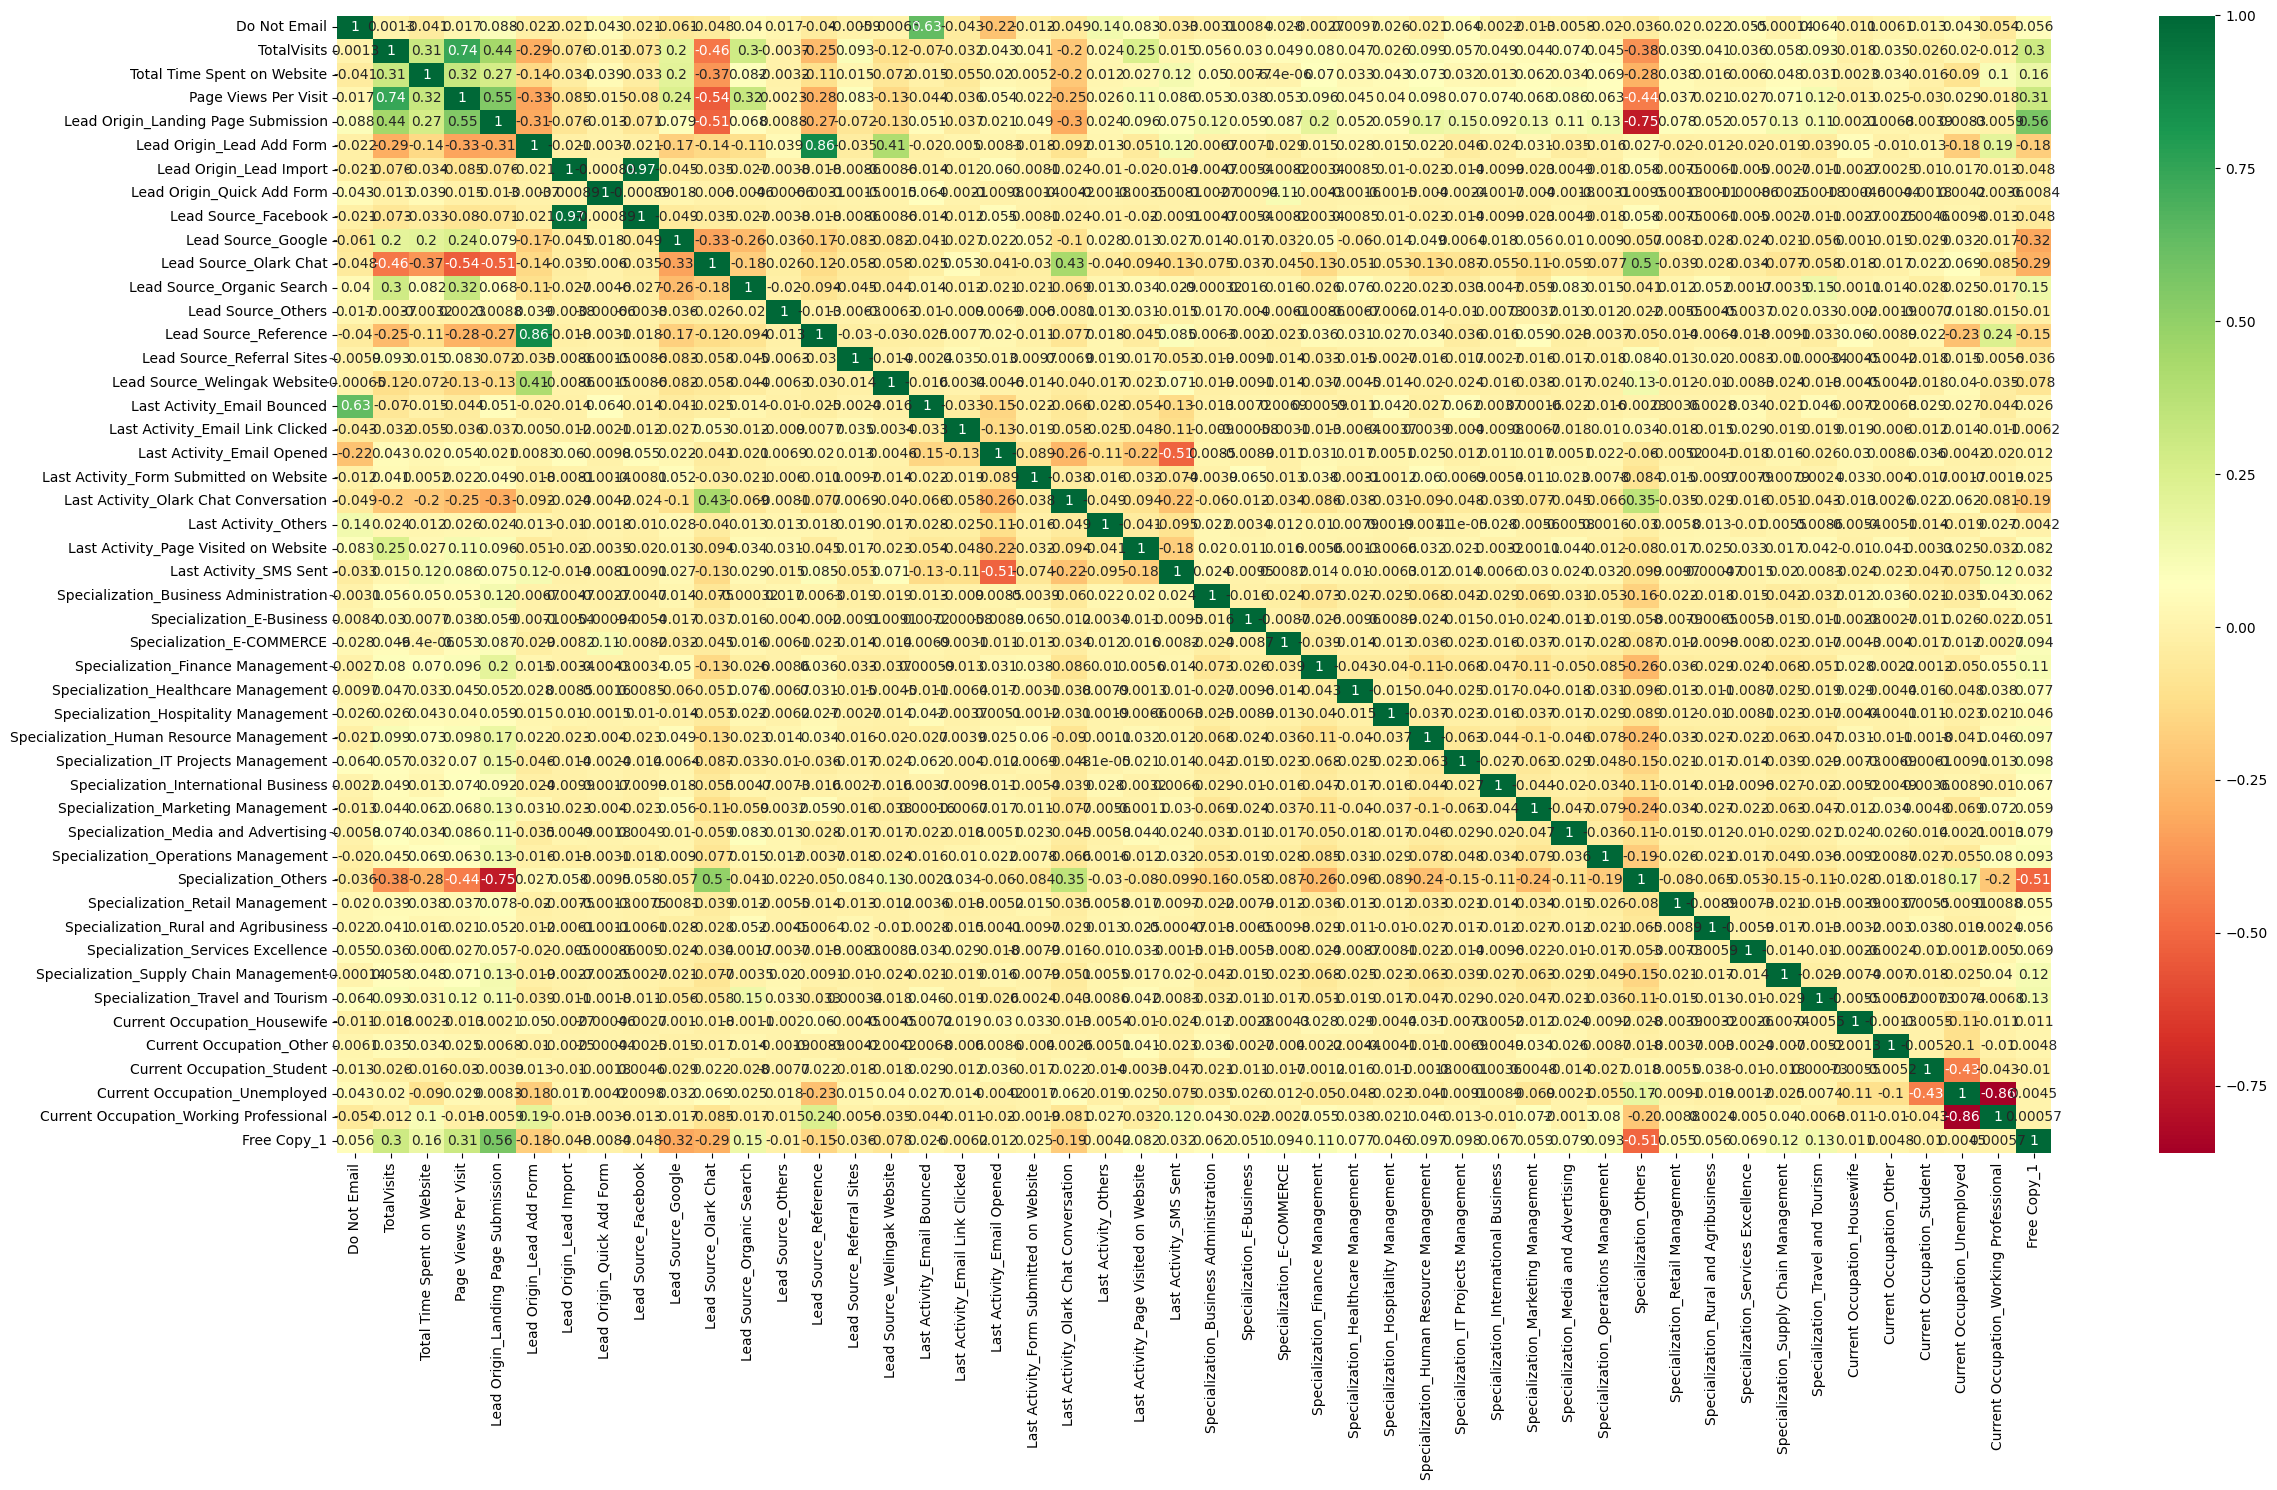

In [79]:
# correlation matrix heatmap
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(), cmap= 'RdYlGn',annot=True)
plt.tight_layout()
plt.show()

## <strong><span style="color: #EA6A47"> Step 5: Model Building </span></strong>
## Feature Selection Using RFE (Recursive Feature Elimination)

In [80]:
# feature Selection Using RFE
log_reg = LogisticRegression()
rfe = RFE(log_reg,n_features_to_select=15)
rfe.fit(X_train,y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [81]:
#checking the output of RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 14),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', True

In [82]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current Occupation_Housewife',
       'Current Occupation_Working Professional'],
      dtype='object')

## Model building
- Building a model using `statsmodels`, for the detailed statistics. 

### Model 1

In [83]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_rfec = sm.add_constant(X_train_rfe)

# Creating the model
log_m = sm.GLM(y_train, X_train_rfec, family= sm.families.Binomial()).fit()

log_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2667.7
Date:                Sat, 28 Oct 2023   Deviance:                       5335.3
Time:                        20:29:08   Pearson chi2:                 8.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3962
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.2759      0.169    -13.493      0.000      -2.607      -1.945
Do Not Email                               -1.1106      0.173     -6.408      0.000      -1.450      -0.771
TotalVisits                                 1.5358      0.208      7.368      0.000       1.127       1.944
Total Time Spent on Website                 4.4374      0.164     26.992      0.000       4.115       4.760
Page Views Per Visit                       -1.1443      0.223     -5.138      0.000      -1.581      -0.708
Lead Origin_Landing Page Submission        -1.0779      0.128     -8.417      0.000      -1.329      -0.827
Lead Origin_Lead Add Form                   3.1235      0.214     14.564      0.000       2.703       3.544
Lead Source_Olark Chat                      1.0150      0.134      7.592      0.000       0.753       1.277
Lead Source_Welingak Website                2.6088      0.754      3.459      0.001       1.131       4.087
Last Activity_Email Opened                  1.0304      0.098     10.538      0.000       0.839       1.222
Last Activity_Others                        1.6246      0.244      6.663      0.000       1.147       2.103
Last Activity_SMS Sent                      2.2294      0.102     21.882      0.000       2.030       2.429
Specialization_Hospitality Management      -1.0331      0.323     -3.200      0.001      -1.666      -0.400
Specialization_Others                      -1.1692      0.123     -9.503      0.000      -1.410      -0.928
Current Occupation_Housewife               23.0584   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current Occupation_Working Professional     2.7130      0.193     14.082      0.000       2.335       3.091
===========================================================================================================
"""

#### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
        $ VIF = 1/(1-R^ 2)$

After passing the arbitrarily selected columns by RFE we will manually evaluate each model's p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on the below criteria.

    High p-value High VIF : Drop the variable
    High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
    Low p-value Low VIF : accept the variable

In [84]:
# function for Variance Inflation Factor
def vif_values(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = vif['VIF'].round(2)
    vif.sort_values(by = 'VIF', ascending = False,inplace = True)
    return vif

In [85]:
vif_values(X_train_rfe)

Features   VIF
3                      Page Views Per Visit  6.60
1                               TotalVisits  4.77
4       Lead Origin_Landing Page Submission  3.91
12                    Specialization_Others  2.49
8                Last Activity_Email Opened  2.31
10                   Last Activity_SMS Sent  2.15
2               Total Time Spent on Website  2.12
6                    Lead Source_Olark Chat  1.93
5                 Lead Origin_Lead Add Form  1.61
7              Lead Source_Welingak Website  1.27
14  Current Occupation_Working Professional  1.21
0                              Do Not Email  1.19
9                      Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02
13             Current Occupation_Housewife  1.01

#### <strong><span style="color:green">Note:</span></strong>
- `Current Occupation_Housewife` has **p value =0.999** .so we drop it and hence rebuild the model

### Model 2

In [86]:
# Dropping Current Occupation_Housewife column.
X_train_rfe_1 = X_train_rfe.drop('Current Occupation_Housewife',axis = 1)

# Adding a constant variable 
X_train_rfec_1 = sm.add_constant(X_train_rfe_1)

# Creating the model
log_m_1 = sm.GLM(y_train, X_train_rfec_1, family= sm.families.Binomial()).fit()

log_m_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.5
Date:                Sat, 28 Oct 2023   Deviance:                       5351.0
Time:                        20:29:09   Pearson chi2:                 8.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.2595      0.168    -13.424      0.000      -2.589      -1.930
Do Not Email                               -1.1161      0.173     -6.443      0.000      -1.456      -0.777
TotalVisits                                 1.5194      0.208      7.299      0.000       1.111       1.927
Total Time Spent on Website                 4.4329      0.164     27.003      0.000       4.111       4.755
Page Views Per Visit                       -1.1468      0.223     -5.154      0.000      -1.583      -0.711
Lead Origin_Landing Page Submission        -1.0725      0.128     -8.383      0.000      -1.323      -0.822
Lead Origin_Lead Add Form                   3.1358      0.214     14.639      0.000       2.716       3.556
Lead Source_Olark Chat                      1.0082      0.134      7.550      0.000       0.746       1.270
Lead Source_Welingak Website                2.5913      0.754      3.436      0.001       1.113       4.069
Last Activity_Email Opened                  1.0287      0.098     10.551      0.000       0.838       1.220
Last Activity_Others                        1.6159      0.244      6.630      0.000       1.138       2.094
Last Activity_SMS Sent                      2.2190      0.102     21.834      0.000       2.020       2.418
Specialization_Hospitality Management      -1.0405      0.323     -3.224      0.001      -1.673      -0.408
Specialization_Others                      -1.1751      0.123     -9.559      0.000      -1.416      -0.934
Current Occupation_Working Professional     2.7038      0.193     14.042      0.000       2.326       3.081
===========================================================================================================
"""

In [87]:
vif_values(X_train_rfe_1)

Features   VIF
3                      Page Views Per Visit  6.60
1                               TotalVisits  4.77
4       Lead Origin_Landing Page Submission  3.91
12                    Specialization_Others  2.49
8                Last Activity_Email Opened  2.31
10                   Last Activity_SMS Sent  2.15
2               Total Time Spent on Website  2.12
6                    Lead Source_Olark Chat  1.93
5                 Lead Origin_Lead Add Form  1.60
7              Lead Source_Welingak Website  1.26
13  Current Occupation_Working Professional  1.21
0                              Do Not Email  1.19
9                      Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02

#### <strong><span style="color:green">Note:</span></strong>
- `Page Views Per Visit` has **VIF = 6.60** which is greater than 5 so we drop it and hence rebuild the model

### Model 3

In [88]:
# Dropping Current Occupation_Housewife column.
X_train_rfe_2 = X_train_rfe_1.drop('Page Views Per Visit',axis = 1)

# Adding a constant variable 
X_train_rfec_2 = sm.add_constant(X_train_rfe_2)

# Creating the model
log_m_2 = sm.GLM(y_train, X_train_rfec_2, family= sm.families.Binomial()).fit()

log_m_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.9
Date:                Sat, 28 Oct 2023   Deviance:                       5377.9
Time:                        20:29:09   Pearson chi2:                 8.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3922
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.4359      0.165    -14.764      0.000      -2.759      -2.112
Do Not Email                               -1.1261      0.173     -6.518      0.000      -1.465      -0.787
TotalVisits                                 0.9337      0.175      5.326      0.000       0.590       1.277
Total Time Spent on Website                 4.4161      0.164     26.963      0.000       4.095       4.737
Lead Origin_Landing Page Submission        -1.1291      0.127     -8.881      0.000      -1.378      -0.880
Lead Origin_Lead Add Form                   3.3465      0.211     15.898      0.000       2.934       3.759
Lead Source_Olark Chat                      1.1931      0.129      9.254      0.000       0.940       1.446
Lead Source_Welingak Website                2.5714      0.753      3.415      0.001       1.095       4.047
Last Activity_Email Opened                  0.9758      0.097     10.104      0.000       0.787       1.165
Last Activity_Others                        1.5635      0.243      6.432      0.000       1.087       2.040
Last Activity_SMS Sent                      2.1410      0.100     21.436      0.000       1.945       2.337
Specialization_Hospitality Management      -1.0650      0.323     -3.293      0.001      -1.699      -0.431
Specialization_Others                      -1.1411      0.122     -9.334      0.000      -1.381      -0.901
Current Occupation_Working Professional     2.7000      0.192     14.031      0.000       2.323       3.077
===========================================================================================================
"""

In [89]:
vif_values(X_train_rfe_2)

Features   VIF
3       Lead Origin_Landing Page Submission  3.44
1                               TotalVisits  2.85
11                    Specialization_Others  2.42
7                Last Activity_Email Opened  2.23
2               Total Time Spent on Website  2.11
9                    Last Activity_SMS Sent  2.06
5                    Lead Source_Olark Chat  1.85
4                 Lead Origin_Lead Add Form  1.57
6              Lead Source_Welingak Website  1.26
12  Current Occupation_Working Professional  1.21
0                              Do Not Email  1.19
8                      Last Activity_Others  1.08
10    Specialization_Hospitality Management  1.02

#### <strong><span style="color:green">Note:</span></strong>
- p-values for all variables is less than 0.05
- VIF values for all variables are less than 5.- This model looks acceptable as everything is under control (p-values & VIFs).
- So we can go ahead and make our predictions using **model 3**.

## predicting the values of train set

In [90]:
# Getting the predicted values on the train set
y_train_pred = log_m_2.predict(X_train_rfec_2)

y_train_pred[:10]

1871    0.433667
6795    0.076927
3516    0.303974
8105    0.792537
3934    0.196555
4844    0.988951
3297    0.129988
8071    0.997091
987     0.128075
7423    0.861309
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43366714, 0.07692736, 0.30397407, 0.79253691, 0.19655453,
       0.98895068, 0.12998787, 0.9970907 , 0.12807539, 0.86130878])

In [92]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_df = pd.DataFrame({'Converted': y_train.values,'Converted_prob':y_train_pred})
y_train_pred_df['Prospect ID']= y_train.index
y_train_pred_df.head()

Converted  Converted_prob  Prospect ID
0          0        0.433667         1871
1          0        0.076927         6795
2          0        0.303974         3516
3          0        0.792537         8105
4          0        0.196555         3934

#### <strong><span style="color:green">Note:</span></strong>
- Now we have to find the optimal cutoff Threshold value of Probability.
- Let's start with **default 0.5 value** and add a new feature predicted in the above dataframe using the probabilities

In [93]:
# assume  Threshold value  = 0.5
y_train_pred_df['Predicted'] = y_train_pred_df['Converted_prob'].apply(lambda x: 1 if x >0.5 else 0)
y_train_pred_df.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0        0.433667         1871          0
1          0        0.076927         6795          0
2          0        0.303974         3516          0
3          0        0.792537         8105          1
4          0        0.196555         3934          0

## confusion matrix

In [94]:
# Confusion matrix 
cf_matrix = metrics.confusion_matrix(y_train_pred_df['Converted'],y_train_pred_df['Predicted'])

cf_matrix

array([[3575,  427],
       [ 813, 1653]], dtype=int64)

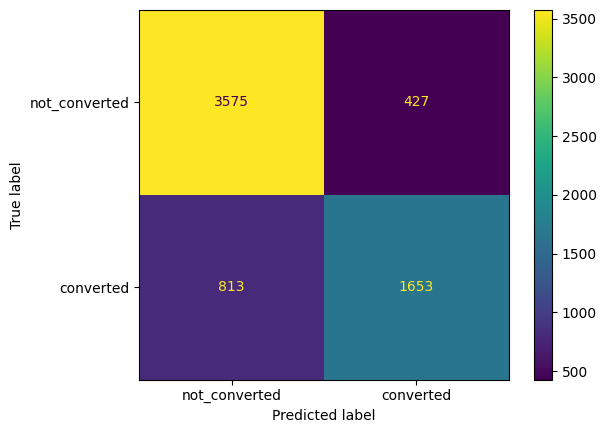

In [95]:
# plotting the confusion matrix
cf_graph = metrics.ConfusionMatrixDisplay(cf_matrix,display_labels=['not_converted','converted'])
cf_graph.plot()
plt.show()

In [96]:
# Function for evaluation metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [97]:
logreg_all_metrics(cf_matrix)

True Negative                    :  3575
True Positive                    :  1653
False Negative                   :  813
False Positve                    :  427
Model Accuracy                   :  0.8083
Model Sensitivity                :  0.6703
Model Specificity                :  0.8933
Model Precision                  :  0.7947
Model Recall                     :  0.6703
Model True Positive Rate (TPR)   :  0.6703
Model False Positive Rate (FPR)  :  0.1067


### Plotting the ROC Curve

An ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
# function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_df["Converted"], y_train_pred_df["Converted_prob" ], drop_intermediate  = False)

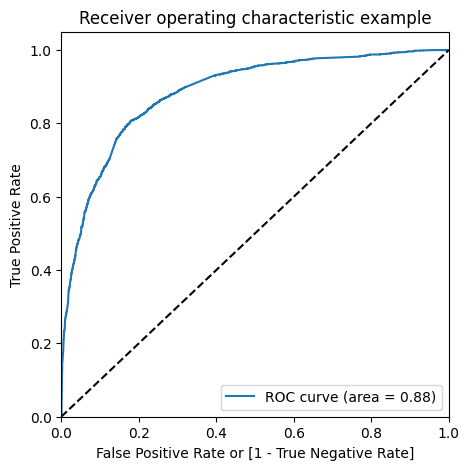

In [100]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_df["Converted"], y_train_pred_df["Converted_prob" ])

#### <strong><span style="color:green">Note:</span></strong>
The area under the ROC curve is **0.88** out of 1 which indicates a good predictive model

###  Finding Optimal Cutoff Point/ Probability
- It is that probability where we get balanced sensitivity and specificity

In [101]:
#  Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.433667         1871          0    1    1    1    1    1   
1          0        0.076927         6795          0    1    0    0    0    0   
2          0        0.303974         3516          0    1    1    1    1    0   
3          0        0.792537         8105          1    1    1    1    1    1   
4          0        0.196555         3934          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['Converted'], y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.614409  0.969586  0.395552
0.2   0.2  0.763451  0.899027  0.679910
0.3   0.3  0.798856  0.840633  0.773113
0.4   0.4  0.818491  0.776967  0.844078
0.5   0.5  0.808287  0.670316  0.893303
0.6   0.6  0.801793  0.601784  0.925037
0.7   0.7  0.783395  0.518248  0.946777
0.8   0.8  0.758040  0.417680  0.967766
0.9   0.9  0.711812  0.259935  0.990255


<Figure size 1000x500 with 0 Axes>

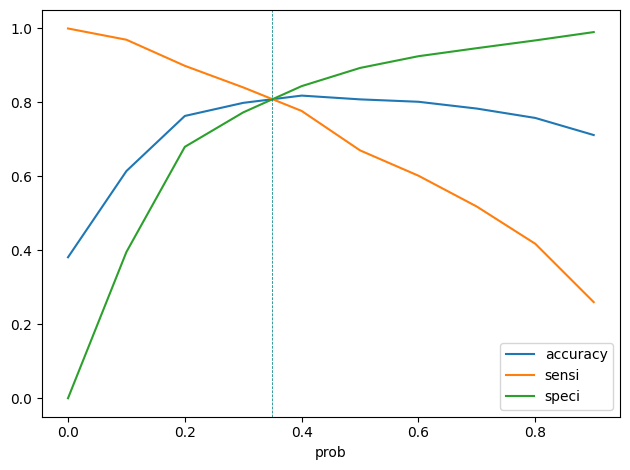

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,5))
ax = cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'] )
plt.axvline(x=0.35, color='teal',linewidth = 0.55, linestyle='--')
plt.tight_layout()
plt.show()

#### <strong><span style="color:green">Note:</span></strong>
**0.35** is the approx. point where all the curves meet, so **0.35** seems to be our **Optimal cutoff point** for the probability threshold.

In [104]:
# Using optimal cutoff point
y_train_pred_df['Final_predicted'] = y_train_pred_df['Converted_prob'].apply(lambda x: 1 if x >0.35 else 0)

# Dropping other cutoff value columns
y_train_pred_df.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],inplace = True,axis = 1)

y_train_pred_df.head()

Converted  Converted_prob  Prospect ID  Final_predicted
0          0        0.433667         1871                1
1          0        0.076927         6795                0
2          0        0.303974         3516                0
3          0        0.792537         8105                1
4          0        0.196555         3934                0

In [105]:
metrics.f1_score(y_train_pred_df['Converted'],y_train_pred_df['Final_predicted'])

0.7656399464319877

### Calculating all metrics using confusion matrix for Train

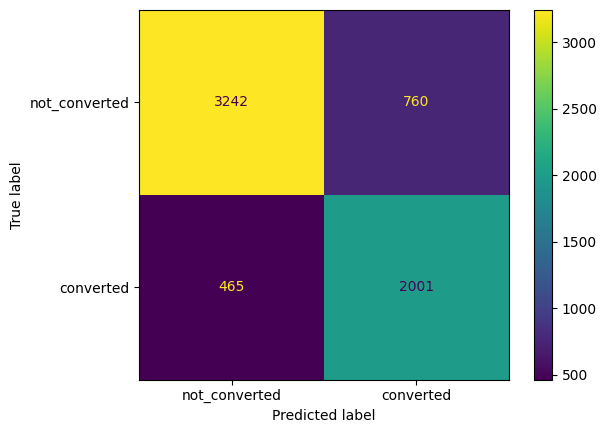

In [106]:
# plotting the confusion matrix
conf_matrix =  metrics.confusion_matrix(y_train_pred_df['Converted'],y_train_pred_df['Final_predicted'])

conf_graph = metrics.ConfusionMatrixDisplay(conf_matrix,display_labels=['not_converted','converted'])
conf_graph.plot()
plt.show()

In [107]:
logreg_all_metrics(conf_matrix)

True Negative                    :  3242
True Positive                    :  2001
False Negative                   :  465
False Positve                    :  760
Model Accuracy                   :  0.8106
Model Sensitivity                :  0.8114
Model Specificity                :  0.8101
Model Precision                  :  0.7247
Model Recall                     :  0.8114
Model True Positive Rate (TPR)   :  0.8114
Model False Positive Rate (FPR)  :  0.1899


### Precision and recall tradeoff

- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [108]:
# Creating precision-recall tradeoff curve
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_df['Converted'], y_train_pred_df['Converted_prob'])

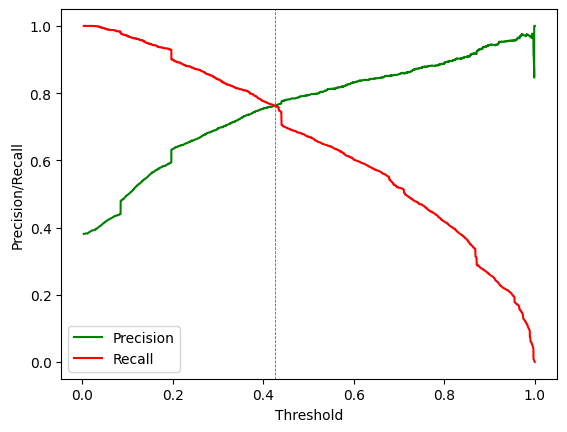

In [109]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# Add legend and axis labels

plt.axvline(x=0.425, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### <strong><span style="color:green">Note:</span></strong>
The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimize the performance of the model based on business requirements, Here our probability threshold is **0.425** approx from the above curve.

In [110]:
# copying df to test model evaluation with precision-recall threshold of 0.425
y_train_pred_recall = y_train_pred_df.copy()

In [111]:
# Using optimal cutoff point as 0.43
y_train_pred_recall['precision_recall_prediction'] = y_train_pred_recall['Converted_prob'].apply(lambda x: 1 if x >0.425 else 0)

y_train_pred_recall.head()

Converted  Converted_prob  Prospect ID  Final_predicted  \
0          0        0.433667         1871                1   
1          0        0.076927         6795                0   
2          0        0.303974         3516                0   
3          0        0.792537         8105                1   
4          0        0.196555         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

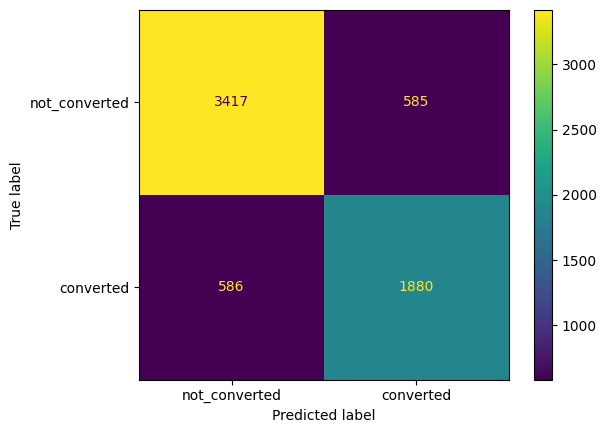

True Negative                    :  3417
True Positive                    :  1880
False Negative                   :  586
False Positve                    :  585
Model Accuracy                   :  0.819
Model Sensitivity                :  0.7624
Model Specificity                :  0.8538
Model Precision                  :  0.7627
Model Recall                     :  0.7624
Model True Positive Rate (TPR)   :  0.7624
Model False Positive Rate (FPR)  :  0.1462


In [112]:
#  calculating all metrics of logistic regression
conf_matrix_p =  metrics.confusion_matrix(y_train_pred_recall['Converted'],y_train_pred_recall['precision_recall_prediction'])

conf_p_graph = metrics.ConfusionMatrixDisplay(conf_matrix_p,display_labels=['not_converted','converted'])
conf_p_graph.plot()
plt.show()


logreg_all_metrics(conf_matrix_p)

Comparsion of evaluation Metrices on different cutoff result from ROC curve and Precision_recall curve


|Metrices|Cutoff:0.35|Cutoff:0.425|
|:----|:----|:----|
|True Negative                    |3253|3415|
|True Positive                    |1994|1884|
|False Negative                   |472|582|
|False Positve                    |749|587|
|Model Accuracy                   |0.81|0.82|
|Model Sensitivity                |0.81|0.76|
|Model Specificity                |0.81|0.85|
|Model Precision                  |0.73|0.76|
|Model Recall                     |0.81|0.76|
|Model True Positive Rate (TPR)   |0.81|0.76|
|Model False Positive Rate (FPR)  |0.19|0.15|


#### <strong><span style="color:green">Note:</span></strong>
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.425 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 76%, but we need it close to 80% as the Business Objective.
- 
80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.35. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.   

### Adding Lead Score Feature to Training dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert- 
Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [113]:
# adding lead score
y_train_pred_df['Lead_score'] = y_train_pred_df['Converted_prob'].apply(lambda x : round(x*100))

y_train_pred_df.head(7)

Converted  Converted_prob  Prospect ID  Final_predicted  Lead_score
0          0        0.433667         1871                1          43
1          0        0.076927         6795                0           8
2          0        0.303974         3516                0          30
3          0        0.792537         8105                1          79
4          0        0.196555         3934                0          20
5          1        0.988951         4844                1          99
6          0        0.129988         3297                0          13

## <strong><span style="color: #EA6A47"> Step 7: Making Prediction On Test set </span></strong>

### Scaling Test dataset

In [114]:
X_test.sample(7)

Do Not Email  TotalVisits  Total Time Spent on Website  \
7017             0          0.0                            0   
7483             0          8.0                          191   
8334             0          0.0                            0   
1087             0          0.0                            0   
373              0          0.0                            0   
3436             0          2.0                          717   
6375             0          0.0                            0   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7017                   0.0                                  0.0   
7483                   4.0                                  1.0   
8334                   0.0                                  0.0   
1087                   0.0                                  0.0   
373                    0.0                                  0.0   
3436                   1.0                                  0.0   
6375                   0.0                                  0.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
7017                        0.0                      0.0   
7483                        0.0                      0.0   
8334                        0.0                      0.0   
1087                        0.0                      0.0   
373                         1.0                      0.0   
3436                        0.0                      0.0   
6375                        1.0                      0.0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
7017                         0.0                   0.0                 0.0   
7483                         0.0                   0.0                 0.0   
8334                         0.0                   0.0                 0.0   
1087                         0.0                   0.0                 0.0   
373                          0.0                   0.0                 0.0   
3436                         0.0                   0.0                 1.0   
6375                         0.0                   0.0                 0.0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
7017                     1.0                         0.0                 0.0   
7483                     0.0                         1.0                 0.0   
8334                     1.0                         0.0                 0.0   
1087                     1.0                         0.0                 0.0   
373                      0.0                         0.0                 0.0   
3436                     0.0                         0.0                 0.0   
6375                     0.0                         0.0                 0.0   

      Lead Source_Reference  Lead Source_Referral Sites  \
7017                    0.0                         0.0   
7483                    0.0                         0.0   
8334                    0.0                         0.0   
1087                    0.0                         0.0   
373                     0.0                         0.0   
3436                    0.0                         0.0   
6375                    1.0                         0.0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
7017                           0.0                          0.0   
7483                           0.0                          0.0   
8334                           0.0                          0.0   
1087                           0.0                          0.0   
373                            1.0                          0.0   
3436                           0.0                          0.0   
6375                           0.0                          0.0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
7017                               0.0                         1.0   
7483                               0.0                     

In [115]:
#caling Test dataset
test_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_test[test_scale] = scaler.transform(X_test[test_scale])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0         0.64                     0.444982   
2376             0         0.00                     0.000000   
7766             0         0.40                     0.025968   
9199             0         0.00                     0.000000   
4359             0         0.00                     0.000000   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
4269              1.000000                                  0.0   
2376              0.000000                                  0.0   
7766              0.666667                                  0.0   
9199              0.000000                                  0.0   
4359              0.000000                                  0.0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
4269                        0.0                      0.0   
2376                        1.0                      0.0   
7766                        0.0                      0.0   
9199                        0.0                      0.0   
4359                        1.0                      0.0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4269                         0.0                   0.0                 0.0   
2376                         0.0                   0.0                 0.0   
7766                         0.0                   0.0                 1.0   
9199                         0.0                   0.0                 0.0   
4359                         0.0                   0.0                 0.0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                     0.0                         0.0                 0.0   
2376                     0.0                         0.0                 0.0   
7766                     0.0                         0.0                 0.0   
9199                     1.0                         0.0                 0.0   
4359                     0.0                         0.0                 0.0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4269                    0.0                         0.0   
2376                    1.0                         0.0   
7766                    0.0                         0.0   
9199                    0.0                         0.0   
4359                    1.0                         0.0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4269                           0.0                          0.0   
2376                           0.0                          0.0   
7766                           0.0                          0.0   
9199                           0.0                          0.0   
4359                           0.0                          0.0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                               0.0                         0.0   
2376                               0.0                         0.0   
7766                               0.0                         0.0   
9199                               0.0                         0.0   
4359                               0.0                         1.0   

      Last Activity_Form Submitted on Website  \
4269                                      0.0   
2376                                      0.0   
7766                                      0.0   
9199                                      0.0   
4359                                      0.0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                    0.0                   0.0   
2376                                    0.0                   0.0   
7766                                    0.0                   1.0   
9199                                    1.0                   0.0   
4359                                    0.0                   0.0   

      Last Activit

In [116]:
X_test.describe()

Do Not Email  TotalVisits  Total Time Spent on Website  \
count   2772.000000  2772.000000                  2772.000000   
mean       0.081890     0.257951                     0.218582   
std        0.274247     0.238832                     0.242693   
min        0.000000     0.000000                     0.000000   
25%        0.000000     0.000000                     0.005722   
50%        0.000000     0.240000                     0.113556   
75%        0.000000     0.400000                     0.417694   
max        1.000000     1.000000                     0.991637   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           2772.000000                          2772.000000   
mean               0.306858                             0.530303   
std                0.257941                             0.499171   
min                0.000000                             0.000000   
25%                0.000000                             0.000000   
50%                0.266667                             1.000000   
75%                0.466667                             1.000000   
max                1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                2772.000000              2772.000000   
mean                    0.073593                 0.007937   
std                     0.261155                 0.088749   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
count                      2772.0           2772.000000         2772.000000   
mean                          0.0              0.007937            0.300866   
std                           0.0              0.088749            0.458717   
min                           0.0              0.000000            0.000000   
25%                           0.0              0.000000            0.000000   
50%                           0.0              0.000000            0.000000   
75%                           0.0              0.000000            1.000000   
max                           0.0              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count             2772.000000                 2772.000000         2772.000000   
mean                 0.189394                    0.133838            0.001804   
std                  0.391892                    0.340540            0.042440   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                    0.000000            0.000000   
50%                  0.000000                    0.000000            0.000000   
75%                  0.000000                    0.000000            0.000000   
max                  1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            2772.000000                 2772.000000   
mean                0.051948                    0.011905   
std                 0.221962                    0.108477   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    0.000000   
75%                 0.000000                    0.000000   
max                 1.000000                    1.000000   

       Lead Source_Welingak Website  Last Activity_Email Bounced  \
count                   2772.000000                  2772.000000   
mean                       0.018398                     0.032828   
std                        0.134411                     0.178219   
min

### Prediction on Test Dataset using final model

In [117]:

X_test_rfe = X_test[X_train_rfe_2.columns]
# Adding constant value
X_test_rfec = sm.add_constant(X_test_rfe)

In [118]:
# making prediction using final model
y_test_pred = log_m_2.predict(X_test_rfec)

In [119]:
y_test_pred[:10]

4269    0.755240
2376    0.871085
7766    0.910175
9199    0.084419
4359    0.868352
9186    0.553238
1631    0.438640
8963    0.135158
8007    0.064632
5324    0.291337
dtype: float64

In [120]:
# Creating a data frame with the actual churn flag and the predicted probabilities
y_test_pred_df = pd.DataFrame({'Converted': y_test.values,'Converted_prob':y_test_pred})
y_test_pred_df['Prospect ID']= y_test.index
y_test_pred_df.head()

Converted  Converted_prob  Prospect ID
4269          1        0.755240         4269
2376          1        0.871085         2376
7766          1        0.910175         7766
9199          0        0.084419         9199
4359          1        0.868352         4359

In [121]:
# Taking sensitivity-specificity method at 0.345 probability cutoff during training
y_test_pred_df['Final_predicted'] = y_test_pred_df['Converted_prob'].apply(lambda x: 1 if x >0.35 else 0)

y_test_pred_df.head()

Converted  Converted_prob  Prospect ID  Final_predicted
4269          1        0.755240         4269                1
2376          1        0.871085         2376                1
7766          1        0.910175         7766                1
9199          0        0.084419         9199                0
4359          1        0.868352         4359                1

### Test Set Model Evaluation

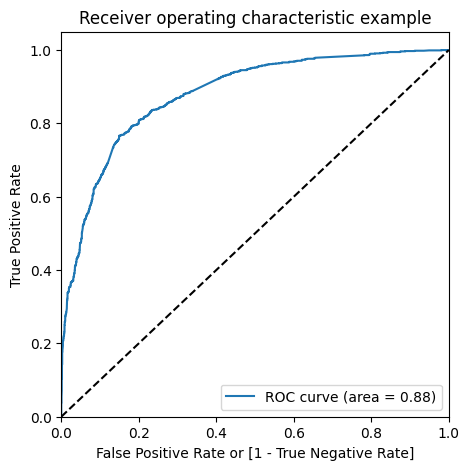

In [122]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_df["Converted"], y_test_pred_df["Converted_prob" ], drop_intermediate  = False)


draw_roc(y_test_pred_df["Converted"], y_test_pred_df["Converted_prob" ])

#### <strong><span style="color:green">Note:</span></strong>
The area under ROC curve is **0.88** out of 1 which indicates a good predictive model

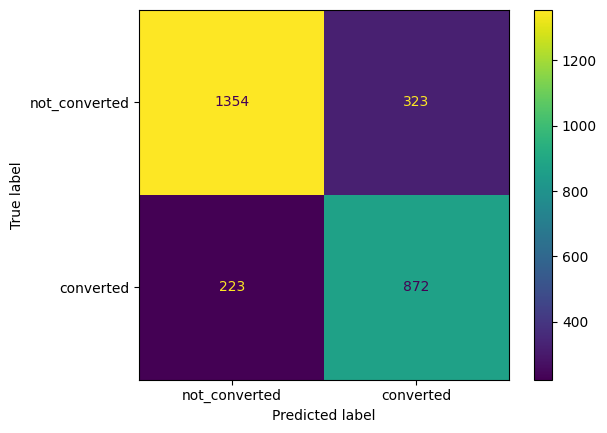

True Negative                    :  1354
True Positive                    :  872
False Negative                   :  223
False Positve                    :  323
Model Accuracy                   :  0.803
Model Sensitivity                :  0.7963
Model Specificity                :  0.8074
Model Precision                  :  0.7297
Model Recall                     :  0.7963
Model True Positive Rate (TPR)   :  0.7963
Model False Positive Rate (FPR)  :  0.1926


In [123]:
# Test set Model Evaluation
conf_matrix_test =  metrics.confusion_matrix(y_test_pred_df['Converted'],y_test_pred_df['Final_predicted'])

conf_test_graph = metrics.ConfusionMatrixDisplay(conf_matrix_test,display_labels=['not_converted','converted'])
conf_test_graph.plot()
plt.show()


logreg_all_metrics(conf_matrix_test)

#### <strong><span style="color:green">Note:</span></strong>
- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
  |from test set|
|:----|
|Accura y : 80.3%|
|Sensitivity : 79.36% ≈ 80%.|
|Specificity : 80.4 | set

These metrics are very close to train set, so out final model log_m_2 is performing with good consistency on both Train & Test set

### Adding Lead Score Feature to Test dataframe

In [124]:
# Adding Lead Score Feature to Test Dataframe
y_test_pred_df['Lead_score'] = y_test_pred_df['Converted_prob'].apply(lambda x : round(x*100))

y_test_pred_df.head(7)

Converted  Converted_prob  Prospect ID  Final_predicted  Lead_score
4269          1        0.755240         4269                1          76
2376          1        0.871085         2376                1          87
7766          1        0.910175         7766                1          91
9199          0        0.084419         9199                0           8
4359          1        0.868352         4359                1          87
9186          1        0.553238         9186                1          55
1631          1        0.438640         1631                1          44

#### <strong><span style="color:green">Note:</span></strong>
     1. The customers with a higher lead score have a higher conversion chance.
     2. The customers with a lower lead score have a lower conversion chance.

### Comparsion of evaluation Metrices on Test and train datasets
| |Cut off = 0.35| |
|:----|:----|:----|
|Metrices|Train set|Test set|
|True Negative                    |3242|1354|
|True Positive                    |2001|872|
|False Negative                   |465|223|
|False Positve                    |760|323|
|Model Accuracy                   |0.8106|0.8030|
|Model Sensitivity                |0.8114|0.7963|
|Model Specificity                |0.8101|0.8074|
|Model Precision                  |0.7247|0.7297|
|Model Recall                     |0.8114|0.7963|
|Model True Positive Rate (TPR)   |0.8114|0.7963|
|Model False Positive Rate (FPR)  |0.1899|0.1926|


#### <strong><span style="color:green">Note:</span></strong>
- The evaluation metrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- The model achieved a **sensitivity of 81.15% in the train set** and **79.62% in the test set**, using a **cut-off value of 0.35**. Sensitivity in this case indicates how many leads the model        identifies correctly out of all potential leads which are converting.
- The CEO of X Education had set a target sensitivity of around 80%. The model also achieved an accuracy of **80.30%**, which is in line with the study's objectives.

In [125]:
# features and their coefficient from final model
params = log_m_2.params.sort_values(ascending= False)
params

Total Time Spent on Website                4.416148
Lead Origin_Lead Add Form                  3.346520
Current Occupation_Working Professional    2.699994
Lead Source_Welingak Website               2.571442
Last Activity_SMS Sent                     2.140983
Last Activity_Others                       1.563461
Lead Source_Olark Chat                     1.193147
Last Activity_Email Opened                 0.975803
TotalVisits                                0.933725
Specialization_Hospitality Management     -1.064971
Do Not Email                              -1.126098
Lead Origin_Landing Page Submission       -1.129117
Specialization_Others                     -1.141065
const                                     -2.435855
dtype: float64

#### <strong><span style="color:green">Note:</span></strong>
- A **high positive coefficient** indicates that a variable has a **stronger influence on predicting** the probability of leads converting to take up X-Education's course.
- The final Logistic Regression Model has **13 features**.ional

#### Top 3 features that contribute positively to predicting hot leads in the model are:
- Total Time Spent on Website
- Lead Origin_Lead Add Form
- Current Occupation_Working Professional

We have determined the following features that have positive coefficients, and these features should be given priority in our marketing and sales efforts to increase lead conversion.
- Total Time Spent on Website
- Lead Origin in Lead Add Form
- Current Occupation in Working Professional
- Lead Source in Welingak Website
- Last Activity in SMS Sent
- Last Activity in Others
- Lead Source in Olark Chat
- Last Activity Email Opened
- Total Visits 
  

We have also identified features with negative coefficients that may indicate potential areas for improvement. These include:
- Specialization in Hospitality
- Do Not Email   
- Lead Origin in Landing Page Submission
- Specialization in Others

### Recommendation

Focus on features with positive coefficients for targeted marketing strategies
- The sales team should prioritize calling leads who have spent a significant amount of time on the website, as Total Time Spent on the Website is a good indicator of interest in X Education's services, with a coefficient of 4.416148.
- Engage working professionals with tailored messaging. Working professionals to be aggressively targeted as they have a high conversion rate and will have better financial situations to pay higher fees too.
- To attract more leads, an increase in budget for advertising and other promotional activities on the Welingak Website is advisable.
- The coefficients for Last Activity in SMS Sent and Last Activity in Email Opened are 2.140983 and 0.975803, respectively, indicating that leads who have been sent SMS messages or have opened emails are more likely to convert. Hence, communication channels should be optimized based on the impact they have on lead engagement.
.



To identify areas of improvement
- Analyse negative coefficients in specialization offerings.
- Review the landing page submission process for areas of improvement.